In [266]:
import PyPDF2
import natsort

import cv2
import numpy as np
import pdf2image
from pdf2image import convert_from_path

import os.path
import matplotlib.pyplot as plt
%matplotlib inline
import random
import img2pdf
from PIL import Image,ImageFont, ImageDraw
import matplotlib.image as mpimg

def des_window():
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1) 

#赤丸の描画
#幅20が最適
def red_circle(im,x,y):
    cv2.circle(im, (x, y), 22, color=(0, 0, 245), thickness=2)
#赤長方形の描画、横25縦35（上15下20）
#323,630
def red_rectangle(im,x,y):
    x1 = x-12
    x2 = x+12
    y1 = y-15
    y2 = y+20
    cv2.rectangle(im, (x1, y1), (x2, y2), color=(0, 0, 245), thickness=2)
#範囲チェック用関数 ,座標の位置、範囲を確認する
def green_rectangle(im,x,y,w=24,h=40):
    x1 = int(x-w/2)
    x2 = int(x+w/2)
    y1 = int(y-h/2)
    y2 = int(y+h/2)
    cv2.rectangle(im, (x1, y1), (x2, y2), color=(245, 0,0 ), thickness=2)

#ばつ印うつ関数
def batu(im,x,y):
    x1 = x-18
    x2 = x+18
    y1 = y-18
    y2 = y+18
    cv2.line(im, (x1-2, y1-2), (x2+2, y2+2), color=(223, 223, 255), thickness=3)
    cv2.line(im, (x1-2, y2+2), (x2+2, y1-2), color=(223, 223, 255), thickness=3)
    cv2.line(im, (x1-1, y1-1), (x2+1, y2+1), color=(160, 160, 255), thickness=2)
    cv2.line(im, (x1-1, y2+1), (x2+1, y1-1), color=(160, 160, 255), thickness=2)
    cv2.line(im, (x1, y1), (x2, y2), color=(120, 120, 255), thickness=2)
    cv2.line(im, (x1, y2), (x2, y1), color=(120, 120, 255), thickness=2)

#アフィン変換　f2→f1への座標変換　変換後のimを返す    
def identity(im,f1,f2):
    h, w = im.shape[:2]
    src = f2.astype(np.float32)
    dest = f1.astype(np.float32)
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(im, affine, (w, h), borderValue=(255, 255, 255))
def identity1(im,f1,f2):
    h, w = im.shape[:2]
    src = f2.astype(np.float32)
    dest = f1.astype(np.float32)
    M = cv2.getPerspectiveTransform( src,dest)
    return cv2.warpPerspective(im, M, (w, h), borderValue=(255, 255, 255))

In [267]:
def mm_degree(screen_ditance,distance,threshold=20):
    degree = (np.arctan(s/d))*2

tan(x/2)=s/d

In [268]:
cd /Users/hasegawatakashikana/Desktop/pic

/Users/hasegawatakashikana/Desktop/pic


In [269]:
pro = convert_from_path("img6.pdf")

PDFPageCountError: Unable to get page count. I/O Error: Couldn't open file 'img6.pdf': No such file or directory.


In [270]:
pro = cv2.imread("img6.png")

In [271]:
pro.shape

(1050, 1680, 3)

In [167]:
for i,j in enumerate(pro):
    j = np.array(j)
    j = j[:900,:900]
#     j.save("/Users/hasegawatakashikana/Desktop/prop/ppp"+str(i)+".pdf",resolution=200)
    Image.fromarray(j).save("/Users/hasegawatakashikana/Desktop/prop/pro"+str(i)+".png")

(2025, 1760, 3)


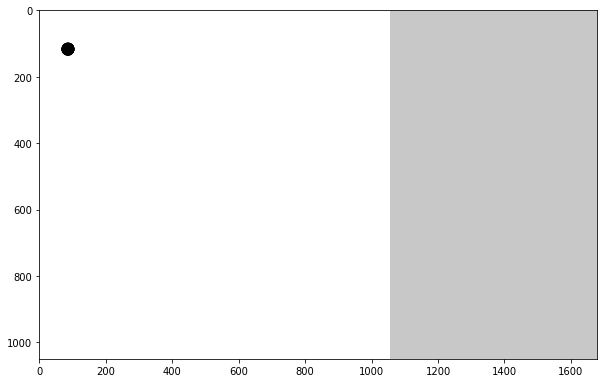

In [259]:
# x = 1680
# y = int(1100*1680/1050)
# print(y)
pro1 = pro[9]
pro1 = np.array(pro1)
pro1 = Image.fromarray(np.uint8(pro1))
pro1=add_margin(pro1,0,326,0,0,(255,255,255))
pro1 = np.array(pro1)
print(pro1.shape)
pro1 = pro1[200:1300,:]
pro1[:,30:230]=pro1[:,200:400]
pro1[:,200:400]=pro1[:,600:800]
pro1 = cv2.resize(pro1,(1680,1050)) 
pro1[:,int(y*3/5):]=[200,200,200]
# Image.fromarray(pro1).save("/Users/hasegawatakashikana/Desktop/prop/pro"+str(12)+".png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro1)

(2025, 1760, 3)


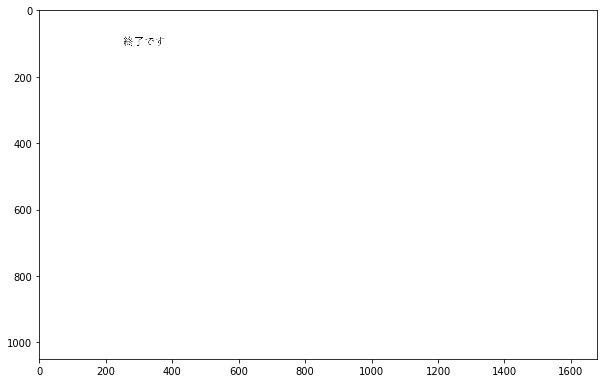

In [260]:
pro2 = pro[10]
pro2 = np.array(pro2)
pro2 = Image.fromarray(np.uint8(pro2))
pro2=add_margin(pro2,0,326,0,0,(255,255,255))
pro2 = np.array(pro2)
print(pro2.shape)
pro2 = pro2[200:1300,:]
pro2 = cv2.resize(pro2,(1680,1050)) 
# pro2[:,int(y*3/5):]=[200,200,200]
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro2)

In [224]:
cap_file = cv2.VideoCapture('pro6.mp4')

In [228]:
print(cap_file.get(cv2.CAP_PROP_FRAME_COUNT) / cap_file.get(cv2.CAP_PROP_FPS))

255.0


(2025, 1760, 3)


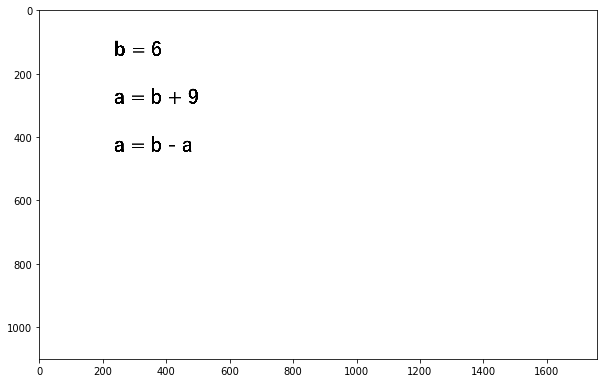

In [248]:
pro2 = pro[0]
pro2 = np.array(pro2)
pro2 = Image.fromarray(np.uint8(pro2))
pro2=add_margin(pro2,0,326,0,0,(255,255,255))
pro2 = np.array(pro2)
print(pro2.shape)
pro2 = pro2[200:1300,:]
# pro2 = cv2.resize(pro2,(1680,1050)) 
# pro2[:,int(y*3/5):]=[200,200,200]
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro2)

In [64]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result


(2025, 1760, 3)


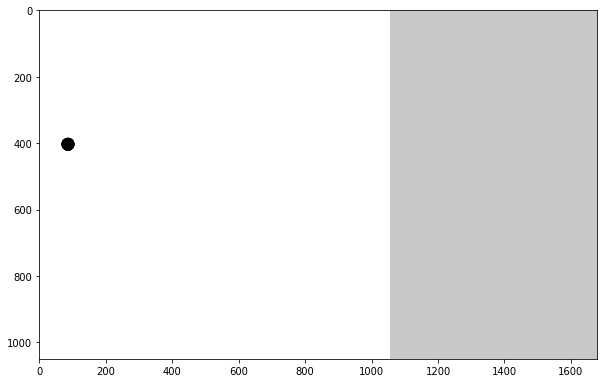

In [261]:
pro3 = pro[11]
pro3 = np.array(pro3)
pro3 = Image.fromarray(np.uint8(pro3))
pro3=add_margin(pro3,0,326,0,0,(255,255,255))
pro3 = np.array(pro3)
print(pro3.shape)
pro3 = pro3[200:1300,:]
pro3[:,30:230]=pro3[:,200:400]
pro3[:,200:400]=pro3[:,600:800]
pro3 = cv2.resize(pro3,(1680,1050)) 
pro3[:,int(y*3/5):]=[200,200,200]
# Image.fromarray(pro1).save("/Users/hasegawatakashikana/Desktop/prop/pro"+str(12)+".png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro3)

(2025, 1760, 3)


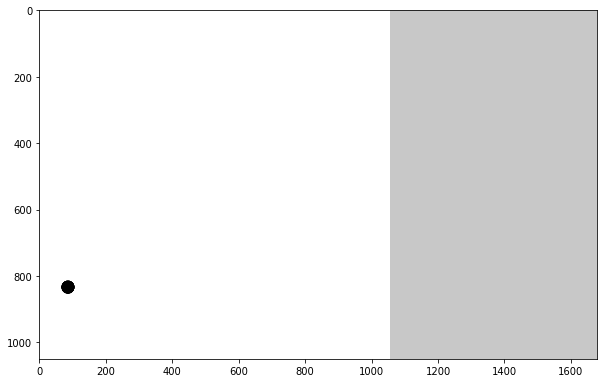

In [262]:
pro4 = pro[12]
pro4 = np.array(pro4)
pro4 = Image.fromarray(np.uint8(pro4))
pro4=add_margin(pro4,0,326,0,0,(255,255,255))
pro4 = np.array(pro4)
print(pro4.shape)
pro4 = pro4[200:1300,:]
pro4[:,30:230]=pro4[:,200:400]
pro4[:,200:400]=pro4[:,600:800]
pro4 = cv2.resize(pro4,(1680,1050)) 
pro4[:,int(y*3/5):]=[200,200,200]
# Image.fromarray(pro1).save("/Users/hasegawatakashikana/Desktop/prop/pro"+str(12)+".png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro4)

(2025, 1760, 3)


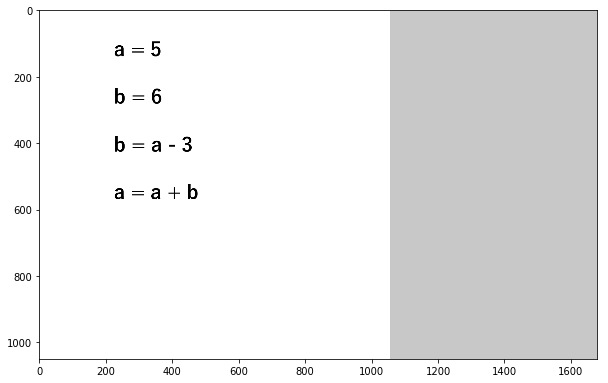

In [256]:
pro5 = pro[3]
pro5 = np.array(pro5)
pro5 = Image.fromarray(np.uint8(pro5))
pro5=add_margin(pro5,0,326,0,0,(255,255,255))
pro5 = np.array(pro5)
print(pro5.shape)
pro5 = pro5[200:1300,:]
# pro5[:,30:230]=pro5[:,200:400]
# pro5[:,200:400]=pro5[:,600:800]
pro5 = cv2.resize(pro5,(1680,1050)) 
pro5[:,int(y*3/5):]=[200,200,200]
# Image.fromarray(pro1).save("/Users/hasegawatakashikana/Desktop/prop/pro"+str(12)+".png")
fig = plt.figure(figsize=(10, 10))
plt.imshow(pro5)

In [258]:
fourcc = cv2.VideoWriter_fourcc("m","p","4","v")
video = cv2.VideoWriter("plus.mp4",fourcc,15.0,(1680,1050))
for i in range(75):
    video.write(pro1)
for i in range(450):
    video.write(pro5)
for i in range(30):
    video.write(pro2)
video.release()

(2025, 1434, 3)


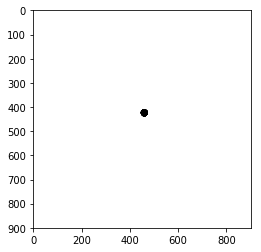

In [9]:
pro3 = pro[9]
pro3 = np.array(pro3)
print(pro3.shape)
pro3 = pro3[:900,:900]
plt.imshow(pro3)

(2025, 1434, 3)


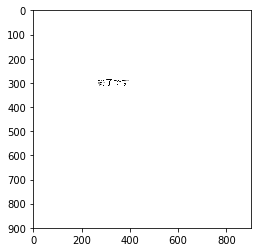

In [10]:
pro4 = pro[10]
pro4 = np.array(pro4)
print(pro4.shape)
pro4 = pro4[:900,:900]
plt.imshow(pro4)

In [263]:
l = [6,5,1,0,4,2,3]
print(l)
fourcc = cv2.VideoWriter_fourcc("m","p","4","v")
video = cv2.VideoWriter("pro8.mp4",fourcc,15.0,(1680,1050))
for i in range(75):
    video.write(pro4)
for i in range(75):
    video.write(pro3)
for i in l:
    for k in range(75):
            video.write(pro1)
    img = pro[i]
    img = np.array(img)
    img = Image.fromarray(np.uint8(img))
    img=add_margin(img,0,326,0,0,(255,255,255))
    img = np.array(img)
    print(img.shape)
    img = img[200:1300,:]
    img = cv2.resize(img,(1680,1050)) 
    img[:,int(y*3/5):]=[200,200,200]
    for i in range(450):
        video.write(img)
for i in range(30):
    video.write(pro2)
video.release()



[6, 5, 1, 0, 4, 2, 3]
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)


In [ ]:
fourcc = cv2.VideoWriter_fourcc("m","p","4","v")
video = cv2.VideoWriter("pro7.mp4",fourcc,15.0,(1680,1050))
for k in range(75):
            video.write(pro1)

In [154]:
fourcc = cv2.VideoWriter_fourcc("m","p","4","v")
video = cv2.VideoWriter("plus.mp4",fourcc,15.0,(1680,1050))
for i in range(75):
    video.write(pro4)
for i in range(75):
    video.write(pro3)
for i in range(75):
    video.write(pro1)
for i in range(30):
    video.write(pro2)
video.release()

In [265]:
l = [6,5,1,0,4,2,3,9,11,12]

for j,i in enumerate(l):
    img = pro[i]
    img = np.array(img)
    img = Image.fromarray(np.uint8(img))
    img=add_margin(img,0,326,0,0,(255,255,255))
    img = np.array(img)
    print(img.shape)
    img = img[200:1300,:]
    img = cv2.resize(img,(1680,1050)) 
    img[:,int(y*3/5):]=[200,200,200]
    Image.fromarray(img).save("/Users/hasegawatakashikana/Desktop/prop/ta"+str(j)+".png")

(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)
(2025, 1760, 3)


In [5]:
import matplotlib.image as mpimg

In [13]:
l = [6,5,1,0,4,2,3]
print(l)
fourcc = cv2.VideoWriter_fourcc("m","p","4","v")
video = cv2.VideoWriter("pro2.mp4",fourcc,15.0,(900,900))
for i in range(75):
    video.write(pro3)
for i,j in enumerate(l):
    if i == 0:
        for k in range(45):
            video.write(pro1)
    else :
        for k in range(45):
            video.write(pro2)
    img = pro[j]
    img = np.array(img)
    img = img[:900,:900]
    for i in range(450):
        video.write(img)
for i in range(75):
    video.write(pro4)    
video.release()
        

[6, 5, 1, 0, 4, 2, 3]


In [16]:
cd /Users/hasegawatakashikana/Desktop

/Users/hasegawatakashikana/Desktop


In [2]:
#https://blogs.yahoo.co.jp/toyama_84/35524959.html
#ヘルマート変換パラメータの取得（推定）
def EstimatHelmart(srcPoint, dstPoint):
    hsX1 =0.0
    hsY1 =0.0
    hsX2 =0.0
    hsY2 =0.0
    hsn  =0.0
    hsM1 =0.0
    hsM2 =0.0
    hsM3 =0.0

    for i in range(len(srcPoint[:])):
        hX1=srcPoint[i][0]
        hY1=srcPoint[i][1]
        hX2=dstPoint[i][0]
        hY2=dstPoint[i][1]

        hsX1 += hX1
        hsY1 += hY1
        hsX2 += hX2
        hsY2 += hY2

        hsn  += 1
        hsM1 += hX1*hX2 + hY1*hY2
        hsM2 += hY1*hX2 - hX1*hY2
        hsM3 += hX1*hX1 + hY1*hY1

    if hsn < 0 :
        # 計算できない場合は変換無しで返す
        htA = 1
        htB = 0
        htC = 0
        htD = 0
    else:
        htA= (hsX1*hsX2+hsY1*hsY2-hsn*hsM1) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htB= (hsY1*hsX2-hsX1*hsY2-hsn*hsM2) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htC= (hsX2-htA*hsX1 - htB*hsY1) / hsn   
        htD= (hsY2-htA*hsY1 + htB*hsX1) / hsn

    return htA, htB, htC, -htB, htA, htD

#アフィン変換の座標を取得
def GetAffinePos( Pt, AfPrm):
    return Pt[0] * AfPrm[0] + Pt[1] * AfPrm[1] + AfPrm[2], Pt[0] * AfPrm[3] + Pt[1] * AfPrm[4] + AfPrm[5]

#２つの座標の距離
def DistancePoints( Pt1, Pt2):
    return ((Pt1[0]-Pt2[0])**2 + (Pt1[1]-Pt2[1])**2)**0.5

#サイズ・チャンネル数の取得
def GetShape( srcImg):
    if len( srcImg.shape) >= 3:
        height, width, channel = srcImg.shape[:3]
    else:
        height, width = srcImg.shape[:2]
        channel = 1
    return height, width, channel

#特徴点の探索
def DetectKeyPoint( detector, srcImg, maxsize=None):
    
    height, width, channel = GetShape( srcImg)

    if channel == 1:
        img = srcImg
    else:
        img = cv2.cvtColor( srcImg, cv2.COLOR_BGR2GRAY) 

    if maxsize is None:
        scale = 1
        imgSz = img
    elif max( height, width) <= maxsize:
        scale = 1
        imgSz = img
    else:
        scale = maxsize / (height if height > width else width)
        imgSz = cv2.resize( img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    kp, des = detector.detectAndCompute( imgSz, None)

    return kp, des, scale, imgSz

#マッチングのフィルタ　（distance による）
def MatchFilterDist(srcMatches, exceptMatches=None, distThreshhold=None):
    if exceptMatches is None:
        badmatch = []
    else:
        badmatch = exceptMatches

    if distThreshhold is None:
        goodmatch = srcMatches
    else:
        goodmatch = []
        
        for m in srcMatches:
            if m.distance <= distThreshhold:
                goodmatch.append(m)
            else:
                badmatch.append(m)

    return goodmatch, badmatch

#座標の取得
def GetMatchPoints( kp1, scale1, kp2, scale2, match):
    srcPt = []
    dstPt = []
    for m in match:
        srcPt.append( (kp1[m.queryIdx].pt[0] / scale1, kp1[m.queryIdx].pt[1] / scale1) )
        dstPt.append( (kp2[m.trainIdx].pt[0] / scale2, kp2[m.trainIdx].pt[1] / scale2) )
    return srcPt, dstPt

#マッチングのフィルタ(ヘルマート変換の推定からの距離による)
def MatchFilterHelmart(kp1, scale1, kp2, scale2, srcMatches, exceptMatches=None, distThreshhold=3):
    if exceptMatches is None:
        badmatch = []
    else:
        badmatch = exceptMatches

    #ヘルマート変換のパラメータを推定する
    srcPt, dstPt  = GetMatchPoints( kp1, scale1, kp2, scale2, srcMatches)
    AffineParams = EstimatHelmart( srcPt, dstPt)
   
    dist=[]
    for i in range(len(srcPt)):
        dstPtEst = GetAffinePos( srcPt[i], AffineParams)
        dist.append( DistancePoints( dstPt[i], dstPtEst ))

    goodmatch = []
    avg = np.average( dist)
    std = np.std( dist)
    for i in range(len(srcMatches)):
        if  abs( dist[i] - avg) <= distThreshhold * std:
            goodmatch.append( srcMatches[i])
        else:
            badmatch.append( srcMatches[i])

    return goodmatch, badmatch

In [3]:
#採点する(画像、マークの座標、まるばつを打つ座標、（スコアの加算))
def check_support(im,x,y,ox,oy,point=0):
    global score
    img_1=im.copy()
    img_1=img_1[x-15:x+20,y-12:y+12]
    if img_1.sum()/((img_1.shape)[0]*(img_1.shape[1]*3)) <190:
        red_circle(im,oy,ox)    
        score += point
    else:
        batu(im,oy,ox)

In [4]:
#2010年度の答案採点
def check2010(im,scoring =False):
    img = im.copy()
    scores=[]
    global score
    score=0
    check_support(img,630,323,630,210,3)
    check_support(img,685,380,685,210,3)
    check_support(img,740,268,745,210,1)
    check_support(img,800,295,800,210,1)
    check_support(img,855,323,855,210,1)
    if score%3 != 0:
        score = score-(score%3)
    check_support(img,915,295,915,210,3)
    
    scores.append(score)
    score=0
    
    check_support(img,970,323,970,210,2)
    check_support(img,1030,351,1030,210,2)
    check_support(img,1085,268,1085,210,2)
    check_support(img,1140,290,1140,210,2)
    check_support(img,1195,263,1195,210,2)
    check_support(img,1250,345,1250,210,2)
    check_support(img,1305,290,1305,210,2)
    check_support(img,1365,263,1365,210,2)
    check_support(img,1420,345,1420,210,2)
    
    check_support(img,630,765,630,715,2)
    
    scores.append(score)
    score=0
    
    check_support(img,685,768,685,715,2)
    check_support(img,740,825,740,715,2)
    check_support(img,798,822,798,714,2)
    check_support(img,855,768,855,714,2)
    check_support(img,910,768,910,714,2)
    check_support(img,970,768,970,713,2)
    check_support(img,1030,793,1030,713,2)
    check_support(img,1085,793,1085,713,1)
    check_support(img,1140,820,1140,712,1)
    check_support(img,1200,850,1200,712,1)
    check_support(img,1255,765,1255,712,1)
    
    scores.append(score)
    
    img[:30,:]=255
    img[1600:,:]=255
    img[:,:30]=255
    img[:,2300:]=255
    if scoring:
        return img,scores
    else:
        return img
    



In [5]:
# 2013年度の答案採点
def check2013(im,scoring=False):
    img = im.copy()
    scores=[]
    global score
    score=0
    
    check_support(img,630,351,630,210,2)
    check_support(img,685,405,685,210,2)
    check_support(img,740,295,745,210,2)
    check_support(img,800,463,800,210,2)
    check_support(img,855,379,855,210,2)
    
    scores.append(score)
    score=0
    
    check_support(img,915,295,915,210,2)
    check_support(img,970,295,970,210,2)
    check_support(img,1030,323,1030,210,2)
    check_support(img,1085,295,1085,210,2)
    check_support(img,1140,351,1140,210,2)
    check_support(img,1195,323,1195,210,2)
    check_support(img,1250,323,1250,210,2)
    check_support(img,1305,323,1305,210,2)
    check_support(img,1365,263,1365,210,2)
    check_support(img,1420,323,1420,210,2)
    
    check_support(img,630,792,630,715,1)
    check_support(img,685,850,685,715,1)
    check_support(img,740,792,740,715,1)
    check_support(img,798,768,798,714,1)
    check_support(img,855,768,855,714,1)
    
    scores.append(score)
    score=0
    score_support=0
    check_support(img,910,822,910,714,1)
    check_support(img,970,768,970,713,1)
    if score==2:
        score_support +=3
    score=0
    check_support(img,1030,792,1030,713,1)
    check_support(img,1085,905,1085,713,1)
    if score==2:
        score_support +=3
    score=0
    check_support(img,1140,850,1140,712,1)
    check_support(img,1200,768,1200,712,1)
    if score==2:
        score_support +=3
    scores.append(score_support)
    score=0
    
    check_support(img,1255,820,1255,712,3)
    check_support(img,1310,958,1310,711,1)
    check_support(img,1370,820,1370,711,1)
    check_support(img,1430,764,1430,710,1)
    
    check_support(img,630,1352,630,1215,3)
    check_support(img,690,1270,690,1215,3)
    check_support(img,745,1352,745,1215,3)
    check_support(img,802,1270,802,1215,3)
    
    scores.append(score)
    
    img[:30,:]=255
    img[1600:,:]=255
    img[:,:30]=255
    img[:,2300:]=255
#     print(scores)
    if scoring:
        return img,scores
    else:
        return img
    


In [6]:
#全採点作業の基準となる答案の読み込み
image_standard_s = convert_from_path("/Users/hasegawatakashikana/Downloads/download/standard.pdf")
#採点作業を行う答案のみとってくる
image_standard = image_standard_s[0]
#numpyになおす
image_standard = np.array(image_standard)

In [67]:
before_folder = "/Users/hasegawatakashikana/Desktop/before/"             #採点したいpdfが入っているフォルダへのpath

for a in os.listdir(before_folder):
    #.DS_storeをはじくため
    if ".pdf" in a:                                                                                       
        #各々と答案へのpath
        a_path = before_folder+a     
        #答案読み込み
        before = convert_from_path(a_path)                                               
        #1枚目だけとってくる
        before_0 = before[0]                                                                      
        before_0 = np.array(before_0)
        #すでにnumpy形式だから単に代入にすればよかったかも...
        image_test = np.array(before_0)                                                       
        #答案が小さすぎた時にリサイズで拡大する(特徴点がうまくマッチングしなくなるため)
        if image_test[90:190,400].mean()>250:                                           
            W,H = image_test.shape[:2]
            image_test = image_test[80:W-80,80:H-80]
            image_test=cv2.resize(image_test,(H,W))
        
        
        ####################  座標変換式の取得  ########################
        img2 = image_test.copy()
        #　採点する答案の端っこの余分な情報削除
        img2[:,2000:] = 255
        img2[:,:100] = 255
        # オリジナル答案のマッチングに不要な情報削除→かなり白紙にする
        img1 = image_standard.copy()
        img1[300:1500,110:1600] = 255                                  

        #特徴点の検索
        #detecter = cv2.ORB_create() #ORB
        detecter = cv2.AKAZE_create() #AKAZE
        #画像の長さの最大値（今回はx値）が1200、リサイズ←あまり等身大の大きさでやると時間がかかる
        kp1, des1, scale1, imgSz1 = DetectKeyPoint( detecter, img1, 1200)
        kp2, des2, scale2, imgSz2 = DetectKeyPoint( detecter, img2, 1200)

        #マッチング
        bf= cv2.BFMatcher( cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match( des1, des2)

        #マッチングの選別
        #最後の引数がdistanceの足切りで小さいほど特徴点の精度が高い(それでもダメな特徴点がある)
        goodmatch, badmatch1 = MatchFilterDist( matches, None, 50) #distance が75以下をgoodmatch
        goodmatch, badmatch2 =MatchFilterHelmart( kp1,scale1, kp2, scale2, goodmatch, None,3)

        #オリジナル画像の特徴点の座標
        img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in goodmatch]
        #採点する画像の特徴点の座標
        img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in goodmatch]
        img1_pt = np.array(img1_pt)    
        img2_pt = np.array(img2_pt)
        #リサイズしていたものをもとのサイズに戻す
        img1_pt = img1_pt*(image_standard.shape[1]/1200)
        img2_pt = img2_pt*(image_standard.shape[1]/1200)

        # やるべきこと
        # １。特徴量３つ選ぶ
        # ２。アフィン変換で調整する
        # ３。採点する
        # ４。逆変換でもとに戻す
        
        #オリジナル画像における有力な特徴点の範囲(座標および縦横の長さ)
        k = 1
        ax1,ax2=int((1323-15)*k),int((1323+15)*k)
        ay1,ay2=int((83-50)*k),int((83+50)*k)
        bx1,bx2=int((140-50)*k),int((140+50)*k)
        by1,by2=int((120-50)*k),int((120+50)*k)
        cx1,cx2=int((1920-160)*k),int((1920+160)*k)
        cy1,cy2=int((1510-15)*k),int((1510+15)*k)
        dx1,dx2=int((1705-30)*k),int((1705+30)*k)
        dy1,dy2=int((460-30)*k),int((460+30)*k)
        d=140
        feature = []
        feature_stock=[]
        for i,j in enumerate(img1_pt):
            if (j[0]>ax1)&(j[0]<ax2):
                if (j[1]>ay1)&(j[1]<ay2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break
        for i,j in enumerate(img1_pt):
            if (j[0]>bx1)&(j[0]<bx2):
                if (j[1]>by1)&(j[1]<by2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break
        for i,j in enumerate(img1_pt):
            if (j[0]>cx1)&(j[0]<cx2):
                if (j[1]>cy1)&(j[1]<cy2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break

        #オリジナル答案の変換にしようする特徴点の座標リスト
        feature1 = []
        for i in feature:
            feature1.append(img1_pt[i])
        #採点答案の変換にしようする特徴点の座標リスト
        feature2 = []
        for i in feature:
            feature2.append(img2_pt[i])
        feature1 = np.array(feature1)
        feature2 = np.array(feature2)
        
        
        ##########################################################
        
        image = image_test.copy()
        #座標変換
        converted = identity(image,feature1,feature2)
        #採点
        image=check2013(converted)                                   #############採点年度変更箇所
        #逆変換
        image=identity(image,feature2,feature1)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        image = Image.fromarray(np.uint8(image))
        before[0]=image
        #採点済み答案をおきたいフォルダへのpath
        pdf_path = "/Users/hasegawatakashikana/Desktop/after"

        #画像を1枚ずつ読み込み、pdfファイルに変換して保存
        for j,i in enumerate(before):
            #pdfファイルの保存名を指定
            pdf_name = pdf_path + "/" +  "PDF_" + str(j) + ".pdf"
            i.save(pdf_name)
        #保存したpdfファイルを連結して1つのpdfフォルダを作成
        merge = PyPDF2.PdfFileMerger()
        for j in sorted(os.listdir(pdf_path)):
            #.DS_storeをはじくため
            if "PDF_" in j :
                merge.append(pdf_path + "/" + j)
                os.remove(pdf_path + "/" + j)
        merge.write(pdf_path + "/" + a)
        merge.close()

In [138]:
text = "!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~"
max_score_2010=["10","25","9","18"]
for i,j in enumerate(max_score_2010):
    max_score_2010[i]=j.translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(94)}))
max_score_2010

['１０', '２５', '９', '１８']

In [142]:
before_folder = "/Users/hasegawatakashikana/Desktop/before/"             #採点したいpdfが入っているフォルダへのpath
text = "!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~"
max_score_2010=["10","25","9","18"]
for i,j in enumerate(max_score_2010):
    max_score_2010[i]=j.translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(94)}))
for a in os.listdir(before_folder):
    #.DS_storeをはじくため
    if ".pdf" in a:                                                                                       
        #各々と答案へのpath
        a_path = before_folder+a     
        #答案読み込み
        before = convert_from_path(a_path)                                               
        #1枚目だけとってくる
        before_0 = before[0]                                                                      
        before_0 = np.array(before_0)
        #すでにnumpy形式だから単に代入にすればよかったかも...
        image_test = np.array(before_0)                                                       
        #答案が小さすぎた時にリサイズで拡大する(特徴点がうまくマッチングしなくなるため)
        if image_test[90:190,400].mean()>250:                                           
            W,H = image_test.shape[:2]
            image_test = image_test[80:W-80,80:H-80]
            image_test=cv2.resize(image_test,(H,W))
        
        
        ####################  座標変換式の取得  ########################
        img2 = image_test.copy()
        #　採点する答案の端っこの余分な情報削除
        img2[:,2000:] = 255
        img2[:,:100] = 255
        # オリジナル答案のマッチングに不要な情報削除→かなり白紙にする
        img1 = image_standard.copy()
        img1[300:1500,110:1600] = 255                                  

        #特徴点の検索
        #detecter = cv2.ORB_create() #ORB
        detecter = cv2.AKAZE_create() #AKAZE
        #画像の長さの最大値（今回はx値）が1200、リサイズ←あまり等身大の大きさでやると時間がかかる
        kp1, des1, scale1, imgSz1 = DetectKeyPoint( detecter, img1, 1200)
        kp2, des2, scale2, imgSz2 = DetectKeyPoint( detecter, img2, 1200)

        #マッチング
        bf= cv2.BFMatcher( cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match( des1, des2)

        #マッチングの選別
        #最後の引数がdistanceの足切りで小さいほど特徴点の精度が高い(それでもダメな特徴点がある)
        goodmatch, badmatch1 = MatchFilterDist( matches, None, 50) #distance が75以下をgoodmatch
        goodmatch, badmatch2 =MatchFilterHelmart( kp1,scale1, kp2, scale2, goodmatch, None,3)

        #オリジナル画像の特徴点の座標
        img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in goodmatch]
        #採点する画像の特徴点の座標
        img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in goodmatch]
        img1_pt = np.array(img1_pt)    
        img2_pt = np.array(img2_pt)
        #リサイズしていたものをもとのサイズに戻す
        img1_pt = img1_pt*(image_standard.shape[1]/1200)
        img2_pt = img2_pt*(image_standard.shape[1]/1200)

        # やるべきこと
        # １。特徴量３つ選ぶ
        # ２。アフィン変換で調整する
        # ３。採点する
        # ４。逆変換でもとに戻す
        
        #オリジナル画像における有力な特徴点の範囲(座標および縦横の長さ)
        k = 1
        ax1,ax2=int((1323-15)*k),int((1323+15)*k)
        ay1,ay2=int((83-50)*k),int((83+50)*k)
        bx1,bx2=int((140-50)*k),int((140+50)*k)
        by1,by2=int((120-50)*k),int((120+50)*k)
        cx1,cx2=int((1920-160)*k),int((1920+160)*k)
        cy1,cy2=int((1510-15)*k),int((1510+15)*k)
        dx1,dx2=int((1705-30)*k),int((1705+30)*k)
        dy1,dy2=int((460-30)*k),int((460+30)*k)
        d=140
        feature = []
        feature_stock=[]
        for i,j in enumerate(img1_pt):
            if (j[0]>ax1)&(j[0]<ax2):
                if (j[1]>ay1)&(j[1]<ay2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break
        for i,j in enumerate(img1_pt):
            if (j[0]>bx1)&(j[0]<bx2):
                if (j[1]>by1)&(j[1]<by2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break
        for i,j in enumerate(img1_pt):
            if (j[0]>cx1)&(j[0]<cx2):
                if (j[1]>cy1)&(j[1]<cy2):
        #             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                        feature.append(i) 
                        feature_stock.append(i)
        #                 print(j)
        #                 print(i)
                        break

        #オリジナル答案の変換にしようする特徴点の座標リスト
        feature1 = []
        for i in feature:
            feature1.append(img1_pt[i])
        #採点答案の変換にしようする特徴点の座標リスト
        feature2 = []
        for i in feature:
            feature2.append(img2_pt[i])
        feature1 = np.array(feature1)
        feature2 = np.array(feature2)
        
        
        ##########################################################
        
        image = image_test.copy()
        #座標変換
        converted = identity(image,feature1,feature2)
        #採点
        fontpath ='/Users/hasegawatakashikana/Desktop/scoring/font.ttf'
        font = ImageFont.truetype(fontpath, 32)
        image,scores=check2013(converted,scoring=True)
        #############点数表記なしならここからコメントアウト
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        draw.text((1790, 550), "マークシート　", font = font, fill = (0,0,255))
        for i ,j in enumerate(scores):
            scores[i]=str(j).translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(94)}))
            
        for i,j in enumerate(scores):
             
#             draw.text((1800, 600+50*(i)), "大問 "+str(2*i+1)+' : '+str(j)+"／"+max_score_2010[i], font = font, fill = (0,0,255))
            
            if i>0:
                draw.text((1750, 600+50*(i)), "大問 "+str(i+2)+' : '+j+"／"+max_score_2010[i], font = font, fill = (0,0,255))
            else:
                draw.text((1750, 600+50*(i)), "大問 "+str(i+1)+' : '+j+"／"+max_score_2010[i], font = font, fill = (0,0,255))
            
        image = np.array(img_pil)
        ###############点数表記なしコメントアウトここまで
        
        #############採点年度変更箇所
        #逆変換
        image=identity(image,feature2,feature1)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        image = Image.fromarray(np.uint8(image))
        before[0]=image
        #採点済み答案をおきたいフォルダへのpath
        pdf_path = "/Users/hasegawatakashikana/Desktop/after"

        #画像を1枚ずつ読み込み、pdfファイルに変換して保存
        for j,i in enumerate(before):
            #pdfファイルの保存名を指定
            pdf_name = pdf_path + "/" +  "PDF_" + str(j) + ".pdf"
            i.save(pdf_name)
        #保存したpdfファイルを連結して1つのpdfフォルダを作成
        merge = PyPDF2.PdfFileMerger()
        for j in sorted(os.listdir(pdf_path)):
            #.DS_storeをはじくため
            if "PDF_" in j :
                merge.append(pdf_path + "/" + j)
                os.remove(pdf_path + "/" + j)
        merge.write(pdf_path + "/" + a)
        merge.close()

<function matplotlib.pyplot.show(*args, **kw)>

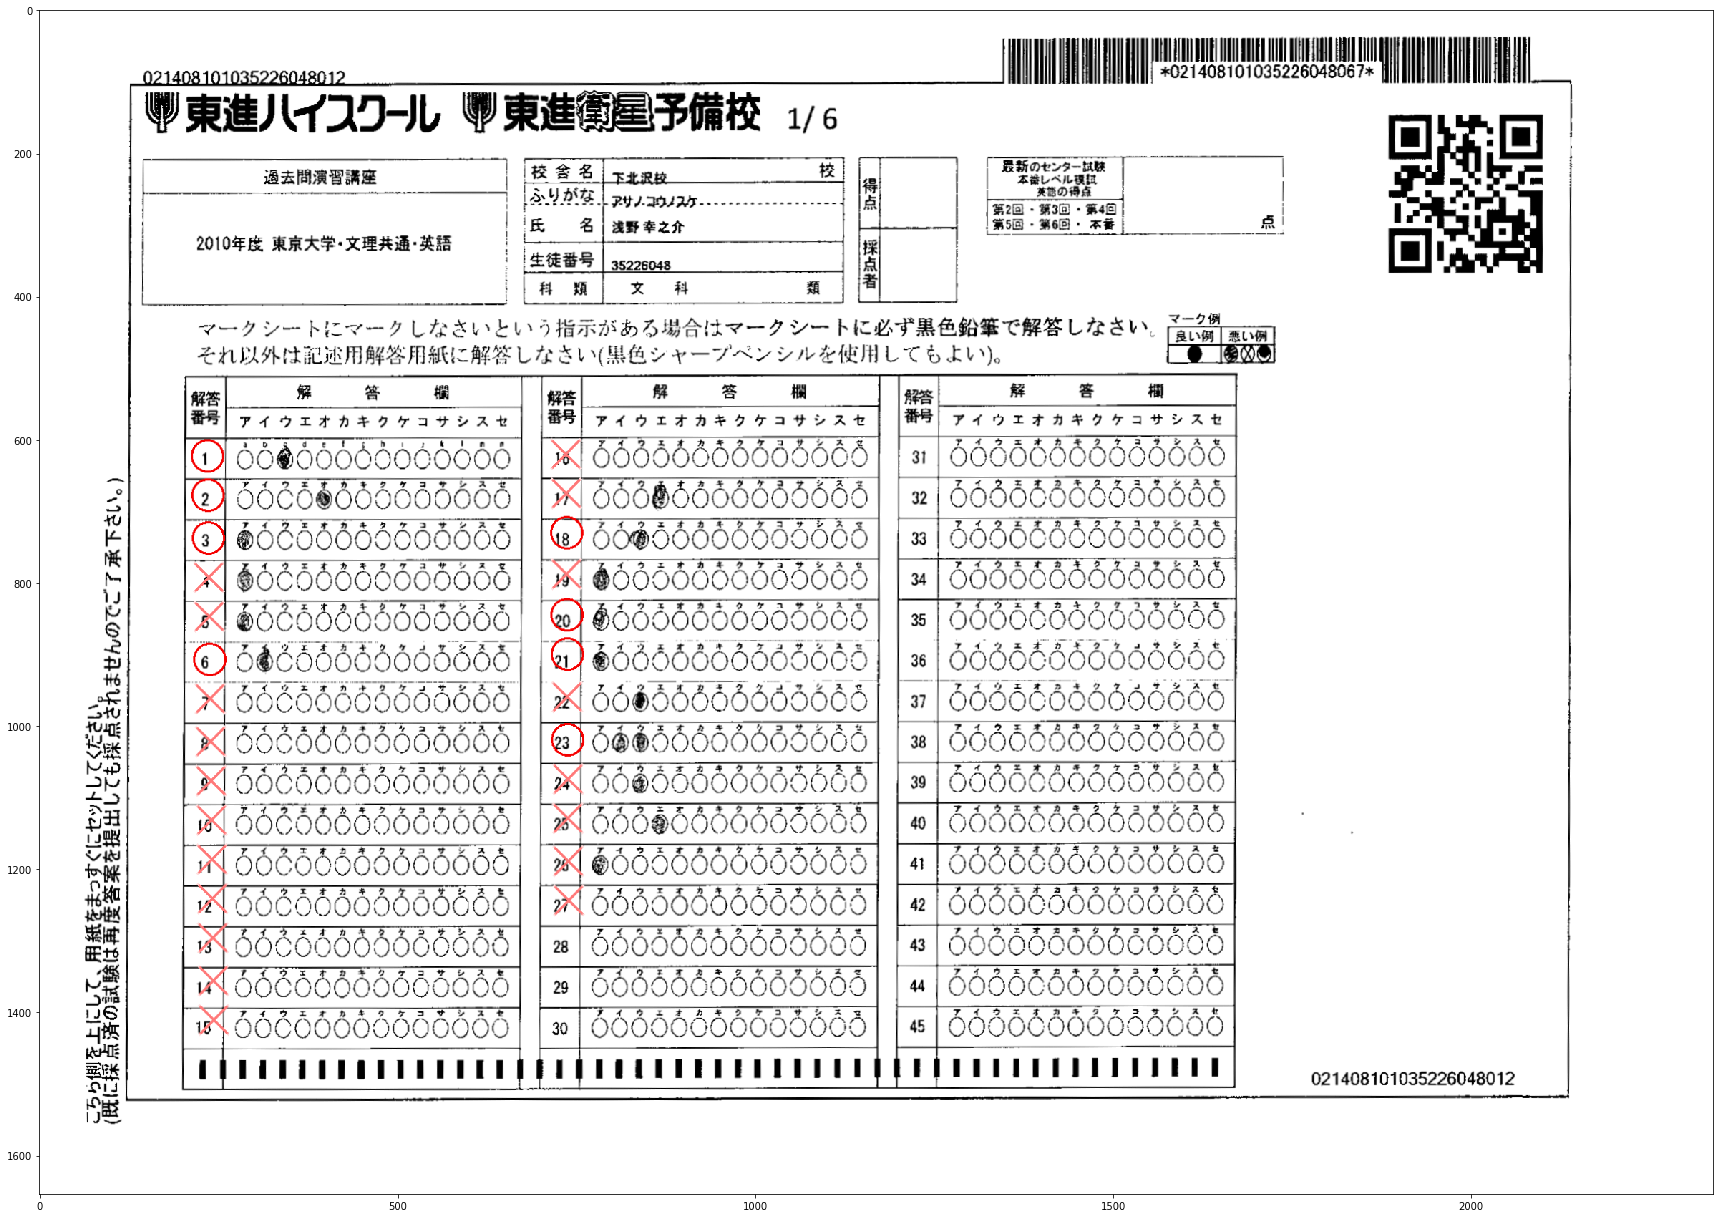

In [30]:
img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in goodmatch]
img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in goodmatch]
# print(img1_pt[:10])
# print(img2_pt[:10])

img1_pt = np.array(img1_pt)    
img2_pt = np.array(img2_pt)
img1_pt = img1_pt*(image_standard.shape[1]/1200)
img2_pt = img2_pt*(image_standard.shape[1]/1200)

# やるべきこと
# １。特徴量３つ選ぶ
# ２。アフィン変換で調整する
# ３。もとの画像の大きさに戻す

k = 1
ax1,ax2=int((1323-15)*k),int((1323+15)*k)
ay1,ay2=int((83-50)*k),int((83+50)*k)
bx1,bx2=int((140-50)*k),int((140+50)*k)
by1,by2=int((120-50)*k),int((120+50)*k)
cx1,cx2=int((1920-160)*k),int((1920+160)*k)
cy1,cy2=int((1510-15)*k),int((1510+15)*k)
dx1,dx2=int((1705-30)*k),int((1705+30)*k)
dy1,dy2=int((460-30)*k),int((460+30)*k)
d=140
feature = []
feature_stock=[]
for i,j in enumerate(img1_pt):
    if (j[0]>ax1)&(j[0]<ax2):
        if (j[1]>ay1)&(j[1]<ay2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
for i,j in enumerate(img1_pt):
    if (j[0]>bx1)&(j[0]<bx2):
        if (j[1]>by1)&(j[1]<by2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
for i,j in enumerate(img1_pt):
    if (j[0]>cx1)&(j[0]<cx2):
        if (j[1]>cy1)&(j[1]<cy2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break

feature1 = []
for i in feature:
    feature1.append(img1_pt[i])
feature2 = []
for i in feature:
    feature2.append(img2_pt[i])
feature1 = np.array(feature1)
feature2 = np.array(feature2)
image = image_test.copy()
converted = identity(image,feature1,feature2)
image=check2010(converted)                                   ######採点年度変更箇所
image=identity(image,feature2,feature1)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(30, 27))
# image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show

In [33]:
image = Image.fromarray(np.uint8(image))
before[0]=image
pdf_path = "/Users/hasegawatakashikana/Desktop/after"

#画像を読み込み、pdfファイルに変換
for j,i in enumerate(before):
    #pdfファイルの保存名を指定
    pdf_name = pdf_path + "/" +  "PDF_" + str(j) + ".pdf"
    i.save(pdf_name)
merge = PyPDF2.PdfFileMerger()
for j in sorted(os.listdir(pdf_path)):
    if "PDF_" in j :
        merge.append(pdf_path + "/" + j)
        os.remove(pdf_path + "/" + j)
merge.write(pdf_path + "/" + a)
merge.close()

In [20]:

image = Image.fromarray(np.uint8(image))
before[0]=image
pdf_path = "/Users/hasegawatakashikana/Desktop/after"

#画像を読み込み、pdfファイルに変換
for j,i in enumerate(before):
    #pdfファイルの保存名を指定
    pdf_name = pdf_path + "/" +  "PDF_" + str(j) + ".pdf"
    i.save(pdf_name)
merge = PyPDF2.PdfFileMerger()
for j in sorted(os.listdir(pdf_path)):
    if "PDF_" in j :
        merge.append(pdf_path + "/" + j)
        os.remove(pdf_path + "/" + j)
merge.write(pdf_path + "/" + a)
merge.close()

In [78]:
!pip list

Package                            Version          
---------------------------------- -----------------
absl-py                            0.7.1            
alabaster                          0.7.11           
anaconda-client                    1.7.2            
anaconda-navigator                 1.9.2            
anaconda-project                   0.8.2            
appdirs                            1.4.3            
appnope                            0.1.0            
appscript                          1.0.1            
asn1crypto                         0.24.0           
astor                              0.7.1            
astroid                            2.0.4            
astropy                            3.0.4            
atomicwrites                       1.3.0            
attrs                              19.1.0           
Automat                            0.7.0            
Babel                              2.6.0            
backcall                           0.1.0      

You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
#ファイル名の取得コード
nowpath = %pwd
file_name = os.listdir(path=c)
file_name

In [120]:
text="1234567890"
# print(text.translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(10)})),1234567890)
trans_table={"1":"１","2":"２","3":"３","4":"４","5":"","6":"","7":"","8":"","9":"９","0":"０"}
text.translate(trans_table)

'1234567890'

In [787]:
image_test1 = convert_from_path("/Users/hasegawatakashikana/Desktop/saiten2013/noclear.pdf")[0]
image_test1 = np.array(image_test1)

<function matplotlib.pyplot.show(*args, **kw)>

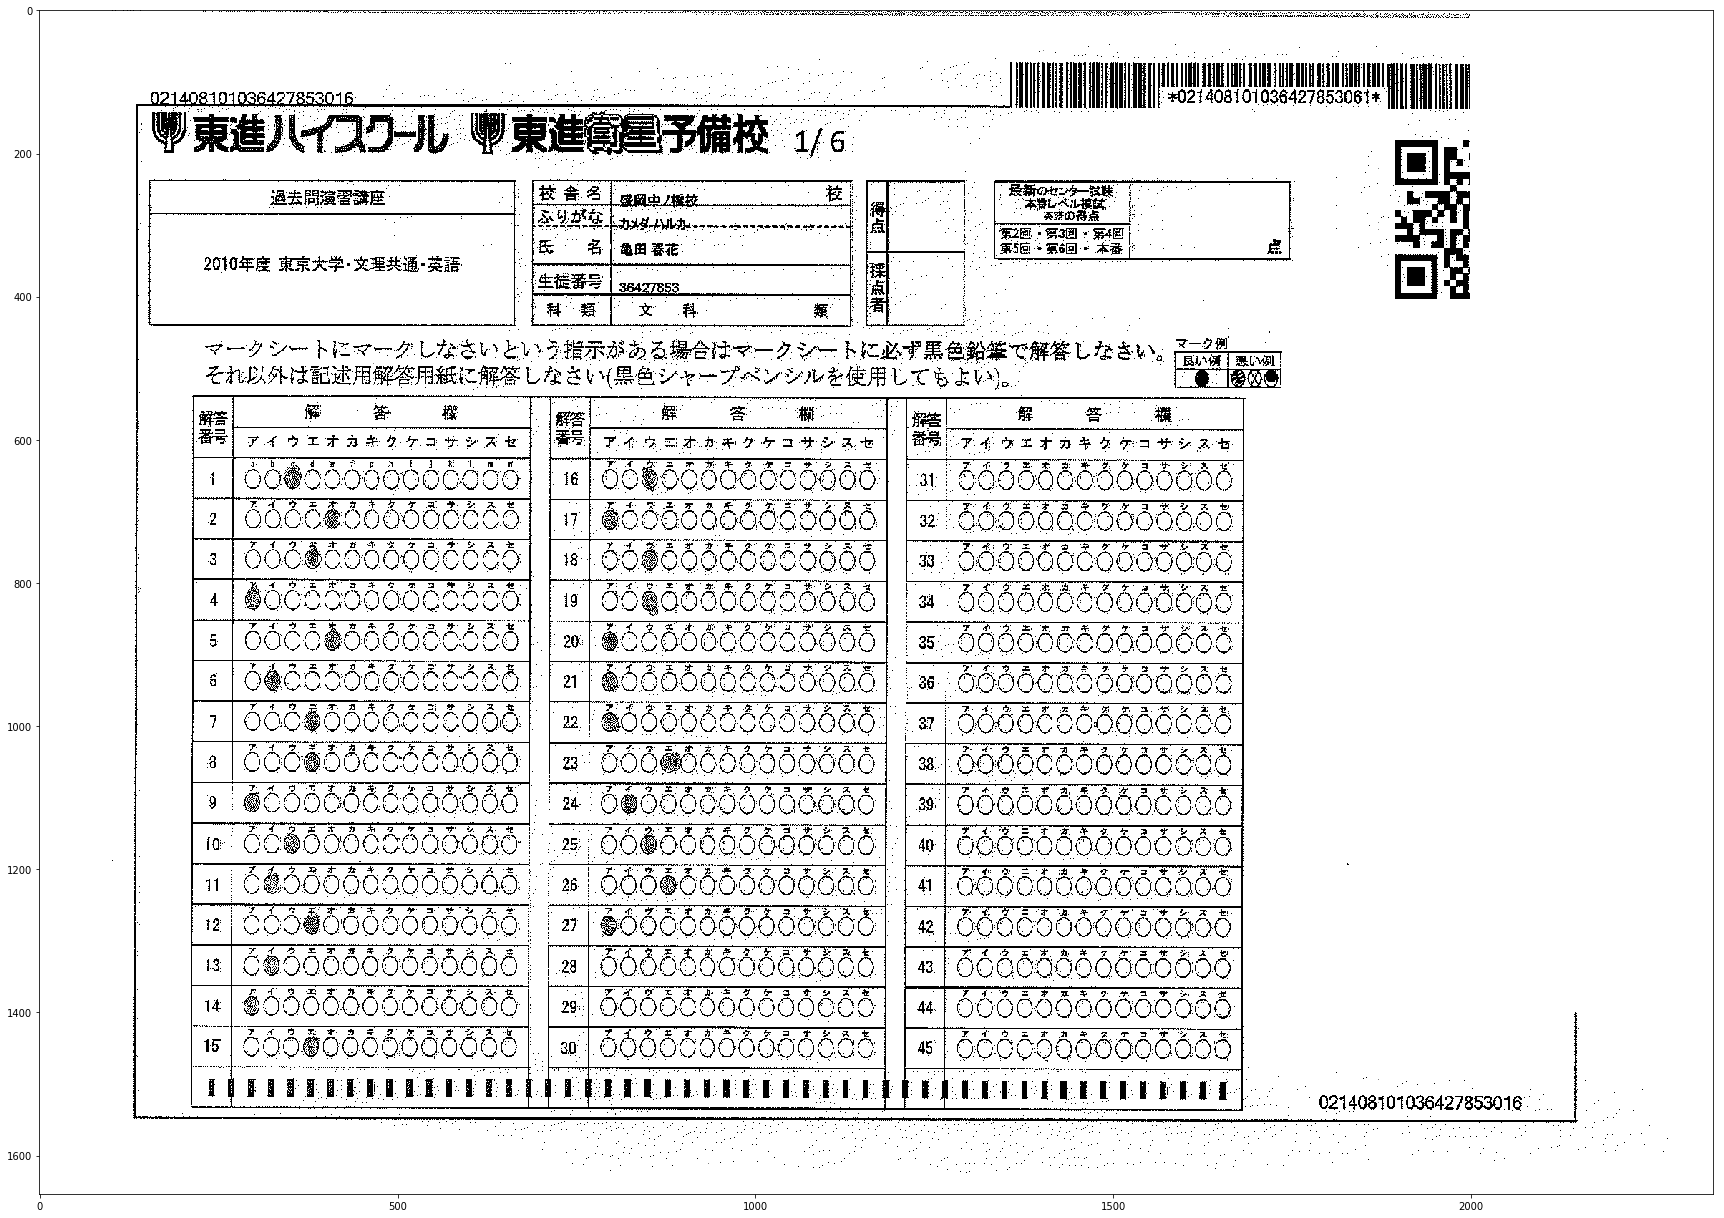

In [7]:
image_test = convert_from_path("/Users/hasegawatakashikana/Desktop/before/021408101036427853.pdf")[0]
image_test = np.array(image_test)
img = image_test.copy()
img[:1400,2000:] = 255
img[:,:100] = 255
fig = plt.figure(figsize=(30, 27))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

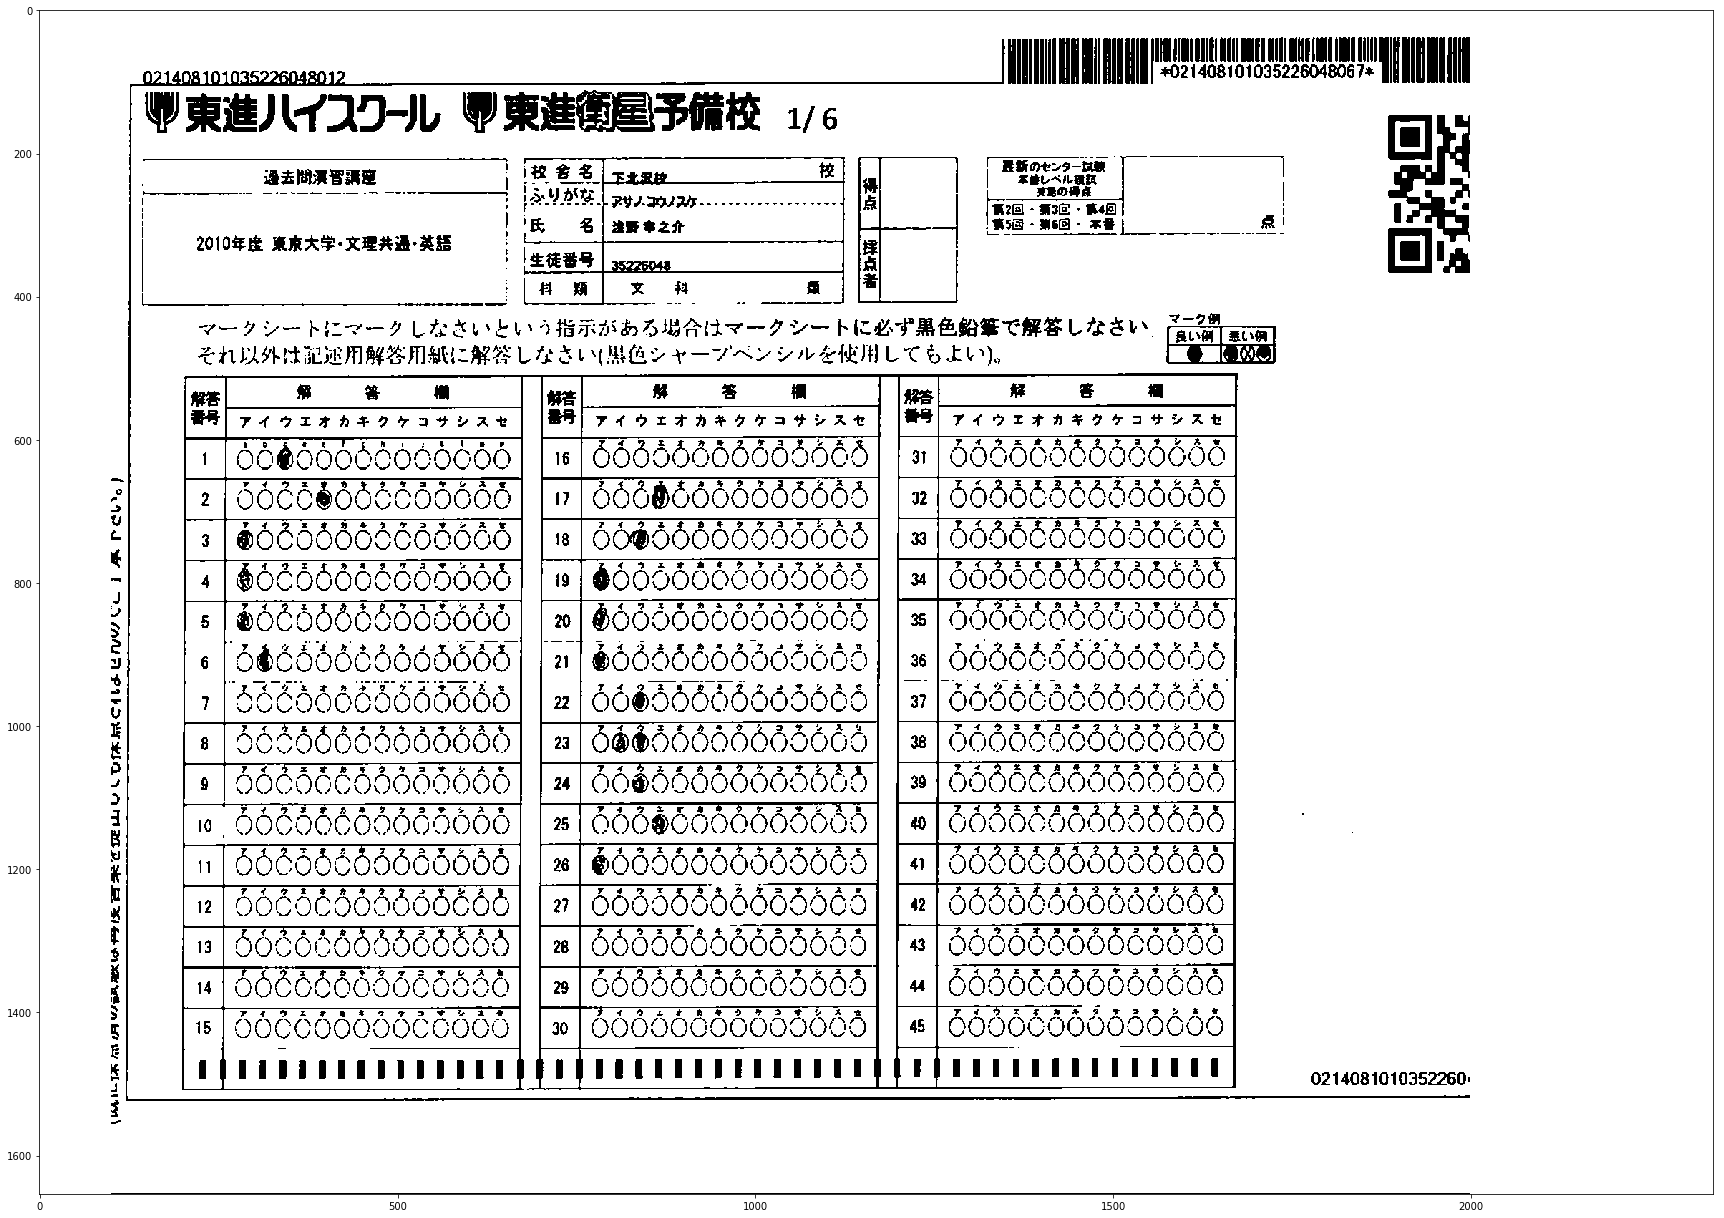

In [18]:
blur = cv2.GaussianBlur(img,(3,3),0)
blur = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY) 
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# cv2.namedWindow("a", cv2.WINDOW_NORMAL)
fig = plt.figure(figsize=(30, 27))
blur=cv2.cvtColor(th3,cv2.COLOR_GRAY2BGR)
plt.imshow(blur)
plt.show

In [53]:
a = [0,1,2]
for i,j in enumerate(a):
    print(i)

0
1
2


In [30]:
a = os.listdir("/Users/hasegawatakashikana/Desktop/before")[2]
a_path = "/Users/hasegawatakashikana/Desktop/before/" +a
before = convert_from_path("/Users/hasegawatakashikana/Desktop/before/021423101039130142.pdf")
before_0 = before[0]
before_0 = np.array(before_0)

In [31]:
image_test = np.array(before_0)
if image_test[90:190,400].mean()>250:
    W,H = image_test.shape[:2]
    image_test = image_test[80:W-80,80:H-80]
    image_test=cv2.resize(image_test,(H,W))
img3 = image_test.copy()
img3[:,2000:] = 255
img3[:,:100] = 255
img_1 = image_standard.copy()
img_1[300:1500,110:1600] = 255
#画像をファイルから読み込み
img1=img_1
img2=img3

#特徴点の検索
#detecter = cv2.ORB_create() #ORB
detecter = cv2.AKAZE_create() #AKAZE

kp1, des1, scale1, imgSz1 = DetectKeyPoint( detecter, img1, 1200)
kp2, des2, scale2, imgSz2 = DetectKeyPoint( detecter, img2, 1200)

#マッチング
bf= cv2.BFMatcher( cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match( des1, des2)

#マッチングの選別
goodmatch, badmatch1 = MatchFilterDist( matches, None, 50) #distance が75以下をgoodmatch
goodmatch, badmatch2 =MatchFilterHelmart( kp1,scale1, kp2, scale2, goodmatch, None,3)



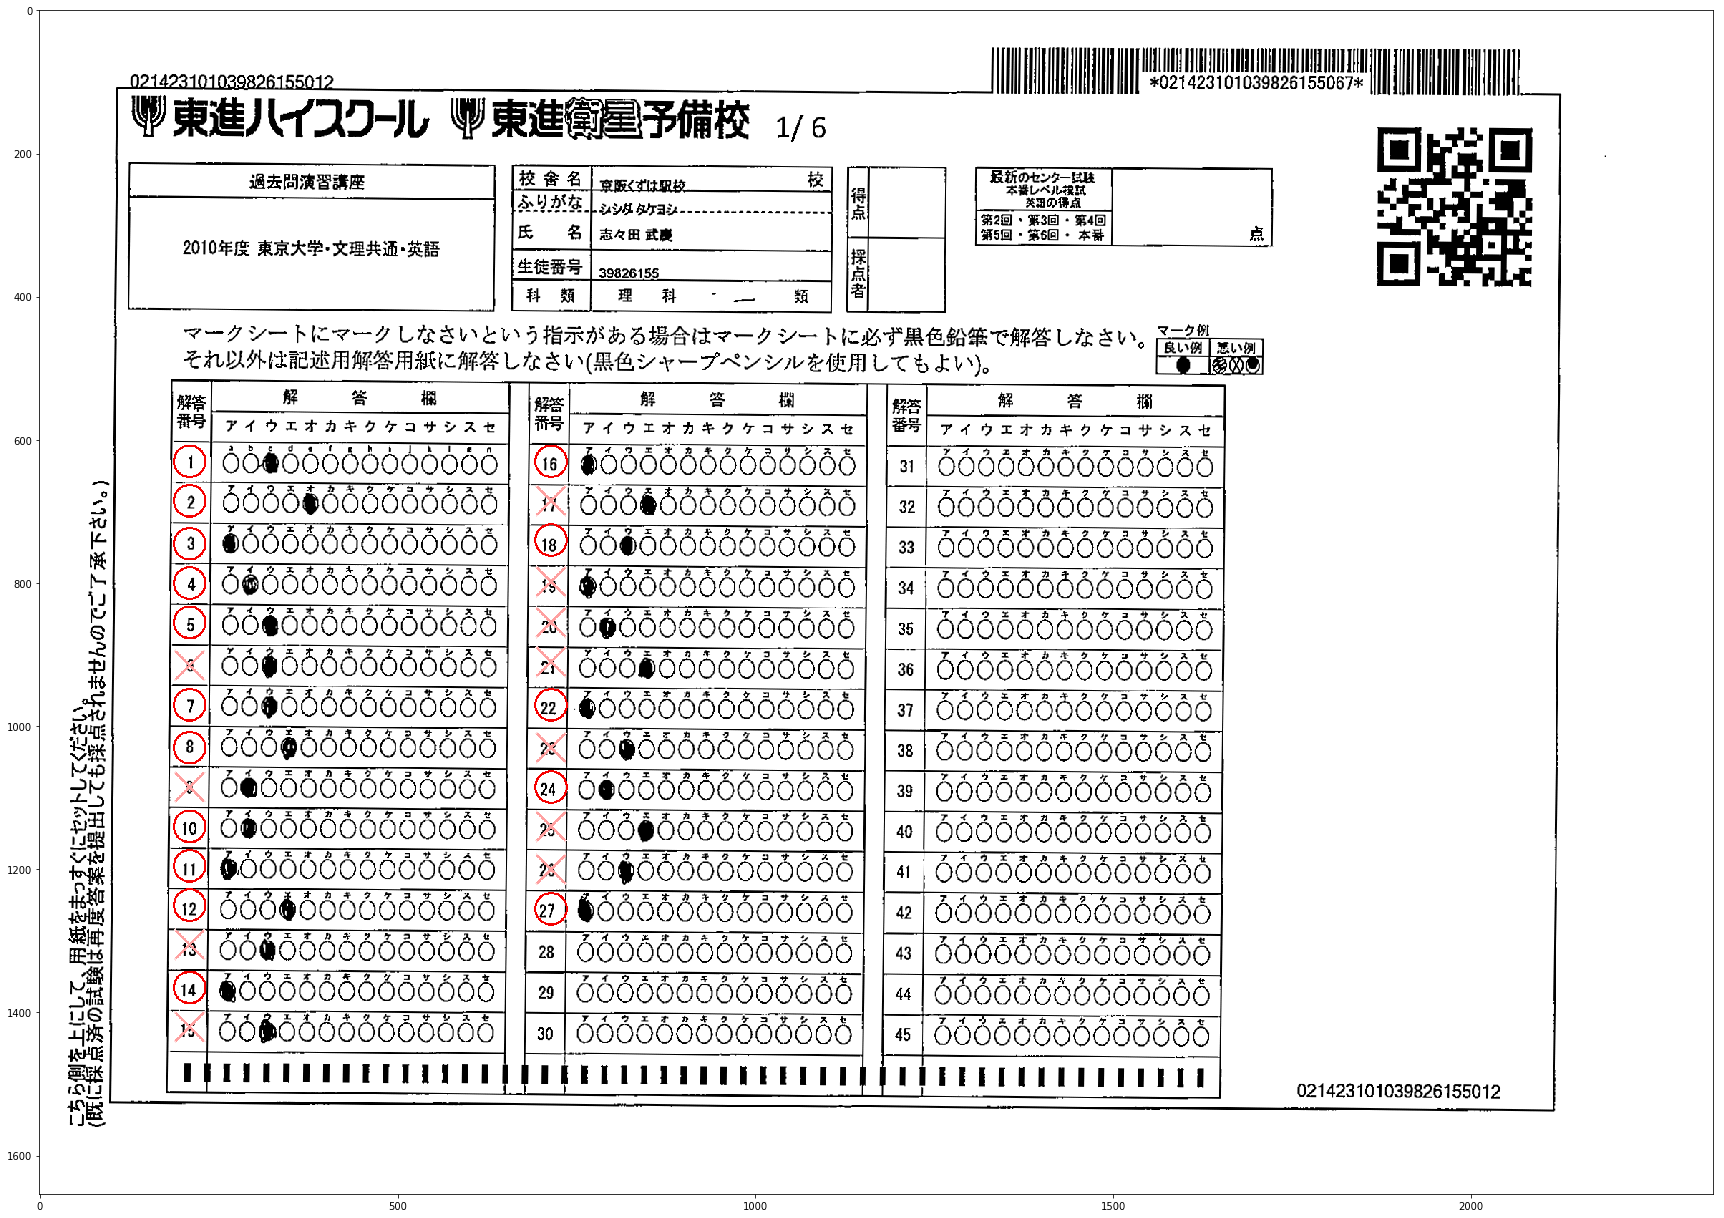

In [272]:
check2010(converted)

In [135]:
text = "!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~"
a=1000
# 変換
str(a).translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(94)}))


'１０００'

<function matplotlib.pyplot.show(*args, **kw)>

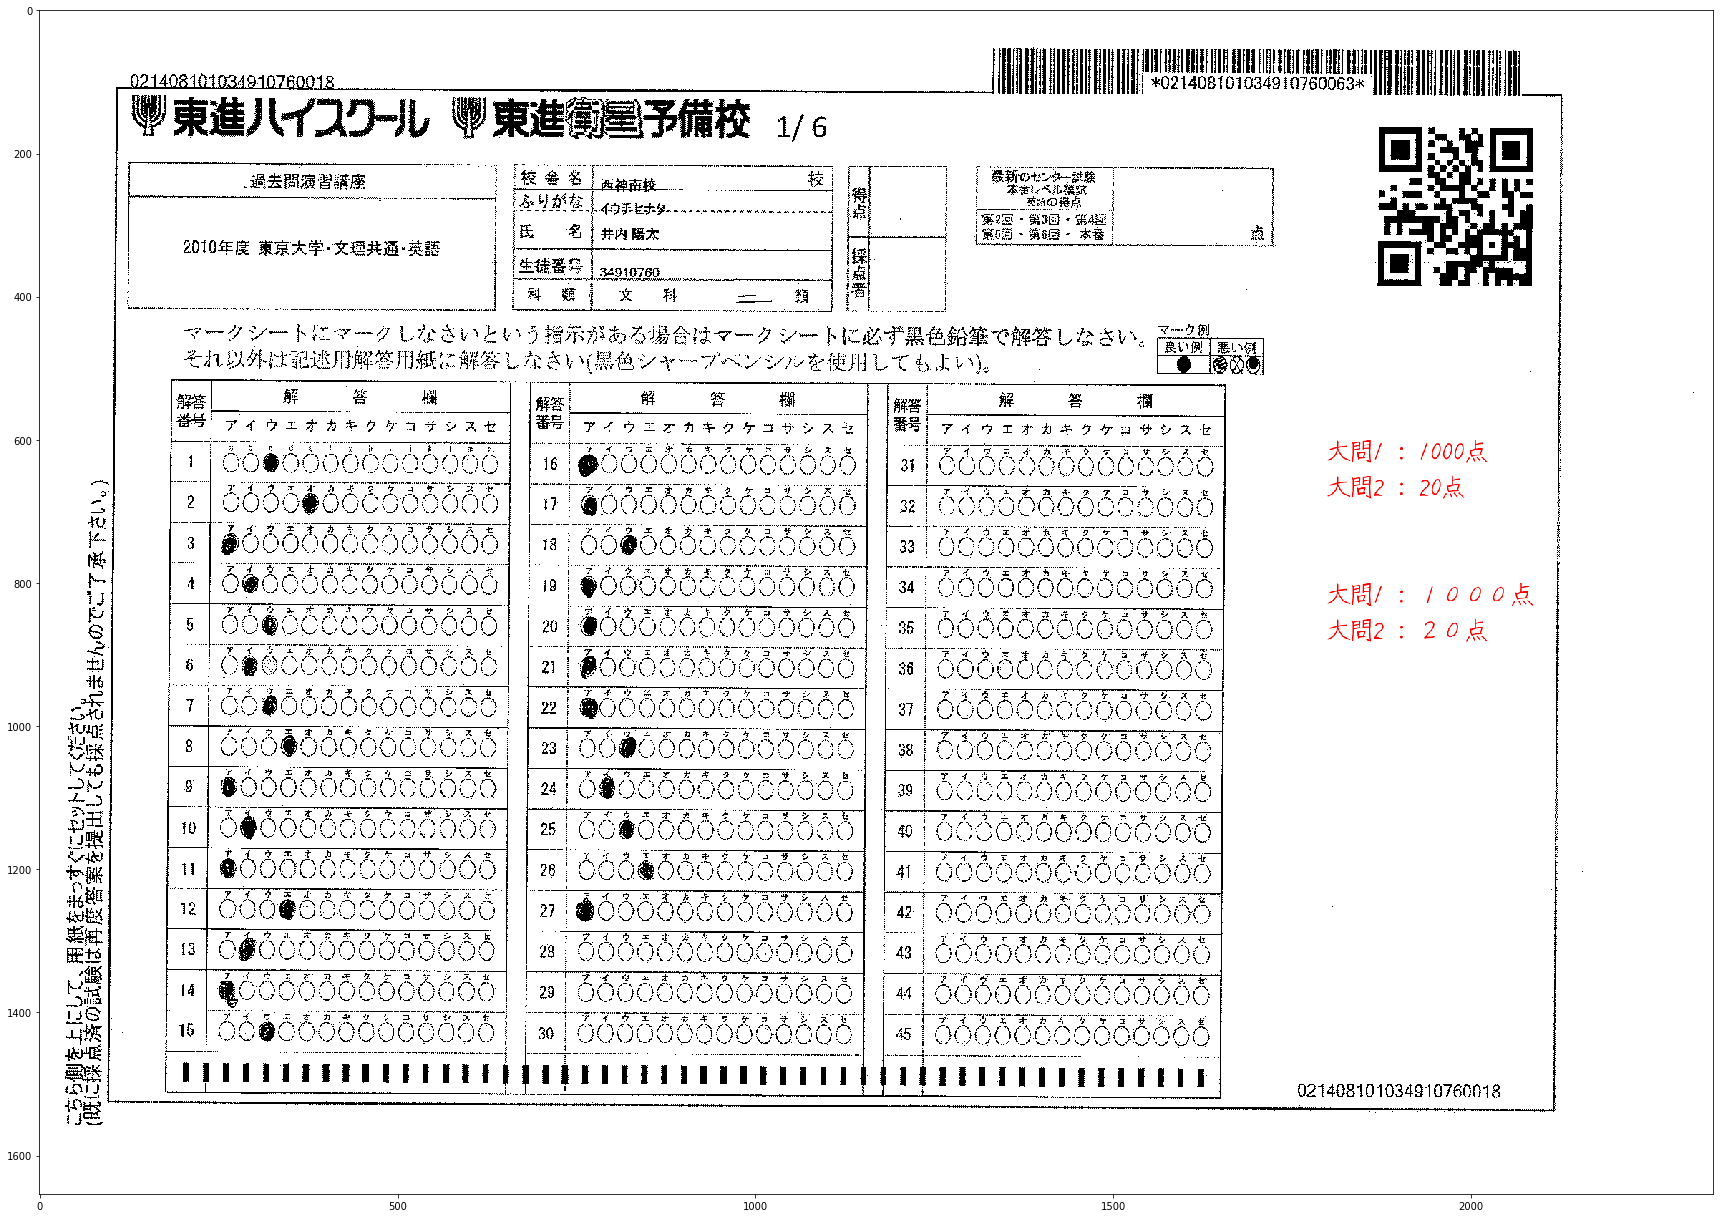

In [136]:
from PIL import ImageFont, ImageDraw, Image
text="1000"
# print(text.translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(10)})),1234567890)
trans_table={"1":"１","2":"２","3":"３","4":"４","5":"","6":"","7":"","8":"","9":"９","0":"０"}
a = text.translate(trans_table)
scores = [1000,20]
fontpath ='/Users/hasegawatakashikana/Desktop/scoring/font.ttf'
font = ImageFont.truetype(fontpath, 32)
img = image_standard.copy()
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
for i,j in enumerate(scores):
#             draw = ImageDraw.Draw(img_pil)
            a = str(scores[i]).translate(str.maketrans({chr(0x0021 + i): chr(0xFF01 + i) for i in range(94)}))
            draw.text((1800, 600+50*i), "大問"+str(i+1)+' : '+str(scores[i])+"点", font = font, fill = (0,0,255))
            draw.text((1800, 800+50*i), "大問"+str(i+1)+' : '+a+"点", font = font, fill = (0,0,255))
#             img = np.array(img_pil)
# draw.text((1800, 600), 'たかや', font = font, fill = (0,0,200))
img = np.array(img_pil)

# cv2.putText(img, u'score1 : '+str(scores[0]), (1800, 600), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), thickness=2)
fig = plt.figure(figsize=(30, 27))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

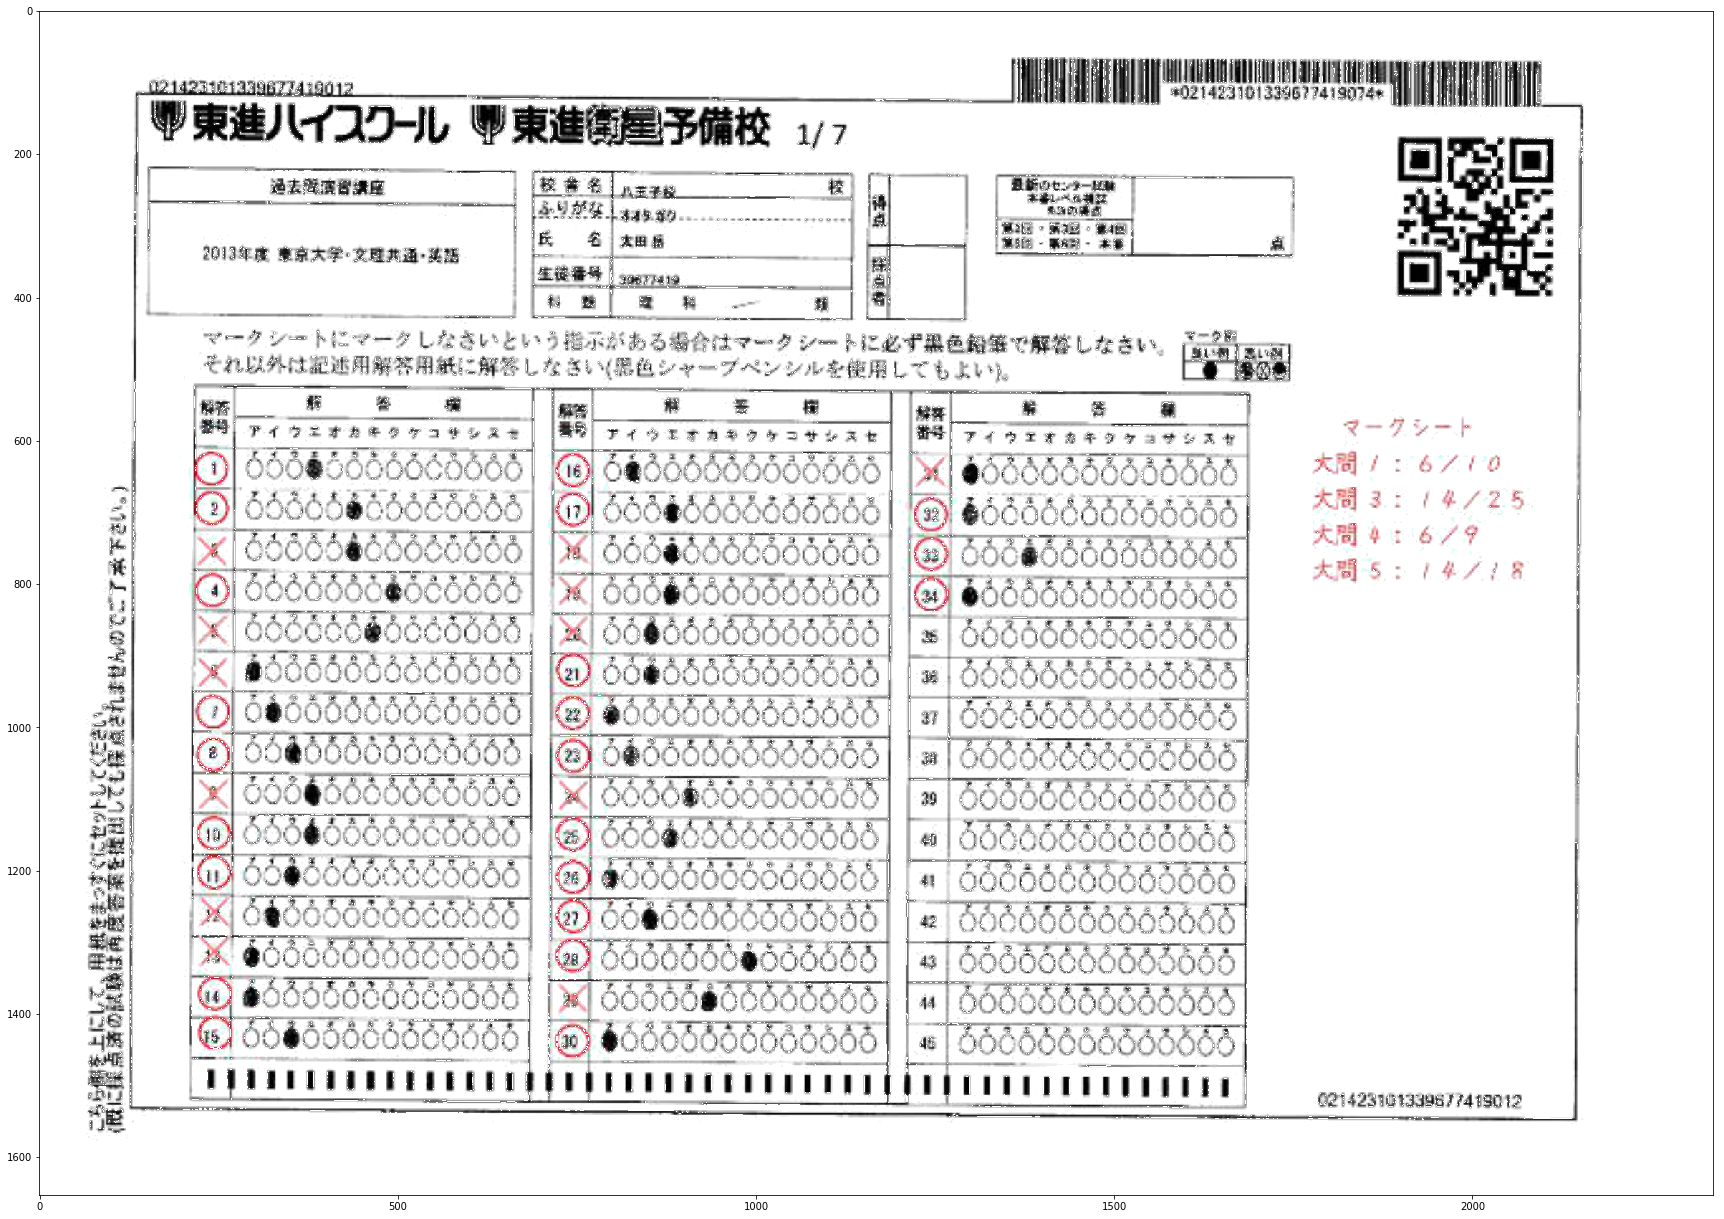

In [444]:
img = image_test.copy()
np.average(img,axis=2).shape
img[(img[:,:,0]+img[:,:,1])/2>115]=255
img =np.power(img,1)
fig = plt.figure(figsize=(30, 27))
plt.imshow(img)
plt.show

In [364]:
dy2

510

In [367]:
k=1
dx1,dx2=int((1705-30)*k),int((1705+30)*k)
dy1,dy2=int((460-30)*k),int((460+30)*k)
img = image_standard.copy()
red_circle(img,dx1,dy1)
red_circle(img,dx2,dy2)
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [102]:
img = image_standard.copy()
red_rectangle(img,250,740)
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [61]:
img_1 = image_standard.copy()
img_1 = img_1[615:650,311:335]
img_1.sum()/((img_1.shape)[0]*(img_1.shape[1]*3))


124.76785714285714

In [1462]:
img = image_standard.copy()
cv2.rectangle(img, (130,160), (1800, 1500), color=(0, 0, 245), thickness=2)
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [1511]:
# img_1 = image_standard.copy()
# img_1[115:1500,110:1880] = 255
# img_1[115:1500,1938:2100] = 255
# # img_1[115:1500,1920:2100] = 255
# # # img_1[115:335,1800:2100] = 255
# # # img_1[375:1500,1800:2100] = 255
# cv2.imshow("a",img_1)
# k = cv2.waitKey(0) & 0xFF 
# if k== ord("q"):
#     des_window()

In [18]:
img_1 = before_0.copy()
img_1[250:400,650:950] = 255
img_1[120:500,1800:2200] = 255
img_1[50:200,1500:2000] = 255
cv2.imshow("a",img_1)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [1493]:
img_2 = image_test.copy()
img_2[115:250,1800:2100] = 255

cv2.imshow("a",img_2)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [20]:
img = image_standard.copy()
cv2.rectangle(img, (50, 50), (250, 250), color=(0, 0, 245), thickness=2)
img = image_standard.copy()
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [19]:
img = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (250, 250), color=(0, 0, 245), thickness=2)
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [33]:
img = np.zeros((300, 300, 3), dtype=np.uint8)
red_circle(img,210,640)
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

<function matplotlib.pyplot.show(*args, **kw)>

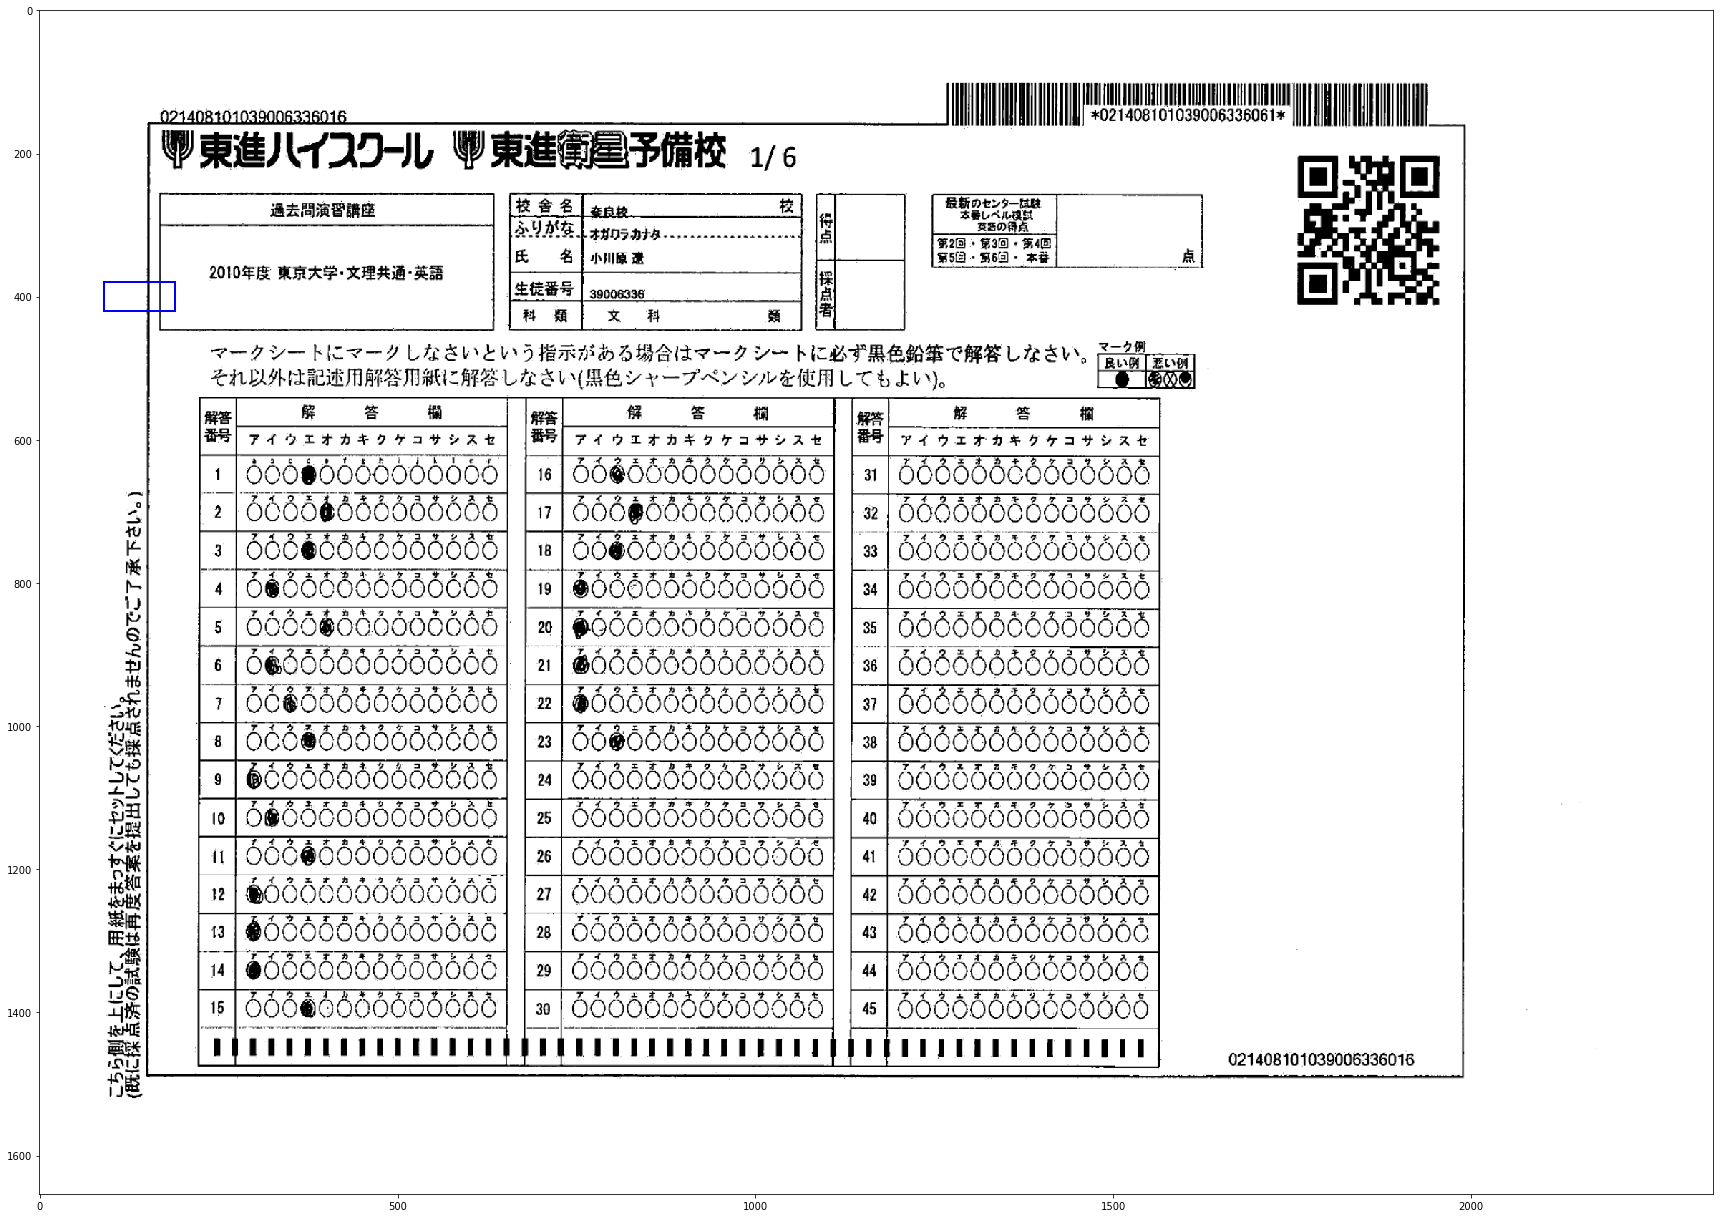

In [584]:
image_test = convert_from_path("test7.pdf")[0]
image_test = np.array(image_test)
# image_test[90:190,400].mean()>250
if image_test[90:190,400].mean()>250:
    W,H = image_test.shape[:2]
    image_test = image_test[80:W-80,80:H-80]
    image_test=cv2.resize(image_test,(H,W))
fig = plt.figure(figsize=(30, 27))
green_rectangle(image_test,140,400,100)
image_test=cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB)
plt.imshow(image_test)
plt.show

In [71]:
imgSz1.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [194]:
cv2.imshow("a",imgSz2)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [120]:

#ヘルマート変換パラメータの取得（推定）
def EstimatHelmart(srcPoint, dstPoint):
    hsX1 =0.0
    hsY1 =0.0
    hsX2 =0.0
    hsY2 =0.0
    hsn  =0.0
    hsM1 =0.0
    hsM2 =0.0
    hsM3 =0.0

    for i in range(len(srcPoint[:])):
        hX1=srcPoint[i][0]
        hY1=srcPoint[i][1]
        hX2=dstPoint[i][0]
        hY2=dstPoint[i][1]

        hsX1 += hX1
        hsY1 += hY1
        hsX2 += hX2
        hsY2 += hY2

        hsn  += 1
        hsM1 += hX1*hX2 + hY1*hY2
        hsM2 += hY1*hX2 - hX1*hY2
        hsM3 += hX1*hX1 + hY1*hY1

    if hsn < 0 :
        # 計算できない場合は変換無しで返す
        htA = 1
        htB = 0
        htC = 0
        htD = 0
    else:
        htA= (hsX1*hsX2+hsY1*hsY2-hsn*hsM1) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htB= (hsY1*hsX2-hsX1*hsY2-hsn*hsM2) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htC= (hsX2-htA*hsX1 - htB*hsY1) / hsn   
        htD= (hsY2-htA*hsY1 + htB*hsX1) / hsn

    return htA, htB, htC, -htB, htA, htD

#アフィン変換の座標を取得
def GetAffinePos( Pt, AfPrm):
    return Pt[0] * AfPrm[0] + Pt[1] * AfPrm[1] + AfPrm[2], Pt[0] * AfPrm[3] + Pt[1] * AfPrm[4] + AfPrm[5]

#２つの座標の距離
def DistancePoints( Pt1, Pt2):
    return ((Pt1[0]-Pt2[0])**2 + (Pt1[1]-Pt2[1])**2)**0.5

#サイズ・チャンネル数の取得
def GetShape( srcImg):
    if len( srcImg.shape) >= 3:
        height, width, channel = srcImg.shape[:3]
    else:
        height, width = srcImg.shape[:2]
        channel = 1
    return height, width, channel

#特徴点の探索
def DetectKeyPoint( detector, srcImg, maxsize=None):
    
    height, width, channel = GetShape( srcImg)

    if channel == 1:
        img = srcImg
    else:
        img = cv2.cvtColor( srcImg, cv2.COLOR_BGR2GRAY) 

    if maxsize is None:
        scale = 1
        imgSz = img
    elif max( height, width) <= maxsize:
        scale = 1
        imgSz = img
    else:
        scale = maxsize / (height if height > width else width)
        imgSz = cv2.resize( img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    kp, des = detector.detectAndCompute( imgSz, None)

    return kp, des, scale, imgSz

#マッチングのフィルタ　（distance による）
def MatchFilterDist(srcMatches, exceptMatches=None, distThreshhold=None):
    if exceptMatches is None:
        badmatch = []
    else:
        badmatch = exceptMatches

    if distThreshhold is None:
        goodmatch = srcMatches
    else:
        goodmatch = []
        
        for m in srcMatches:
            if m.distance <= distThreshhold:
                goodmatch.append(m)
            else:
                badmatch.append(m)

    return goodmatch, badmatch

#座標の取得
def GetMatchPoints( kp1, scale1, kp2, scale2, match):
    srcPt = []
    dstPt = []
    for m in match:
        srcPt.append( (kp1[m.queryIdx].pt[0] / scale1, kp1[m.queryIdx].pt[1] / scale1) )
        dstPt.append( (kp2[m.trainIdx].pt[0] / scale2, kp2[m.trainIdx].pt[1] / scale2) )
    return srcPt, dstPt

#マッチングのフィルタ(ヘルマート変換の推定からの距離による)
def MatchFilterHelmart(kp1, scale1, kp2, scale2, srcMatches, exceptMatches=None, distThreshhold=3):
    if exceptMatches is None:
        badmatch = []
    else:
        badmatch = exceptMatches

    #ヘルマート変換のパラメータを推定する
    srcPt, dstPt  = GetMatchPoints( kp1, scale1, kp2, scale2, srcMatches)
    AffineParams = EstimatHelmart( srcPt, dstPt)
   
    dist=[]
    for i in range(len(srcPt)):
        dstPtEst = GetAffinePos( srcPt[i], AffineParams)
        dist.append( DistancePoints( dstPt[i], dstPtEst ))

    goodmatch = []
    avg = np.average( dist)
    std = np.std( dist)
    for i in range(len(srcMatches)):
        if  abs( dist[i] - avg) <= distThreshhold * std:
            goodmatch.append( srcMatches[i])
        else:
            badmatch.append( srcMatches[i])

    return goodmatch, badmatch



In [621]:
cd /Users/hasegawatakashikana/Desktop/saiten2010

/Users/hasegawatakashikana/Desktop/saiten2010


In [7]:
with open("/Users/hasegawatakashikana/Downloads/021408101038987031.pdf", mode="rb") as f:
    image = PyPDF2.PdfFileReader(f)
   

OSError: [Errno 22] Invalid argument

In [23]:
image.close()

In [25]:
image = open("/Users/hasegawatakashikana/Downloads/download3/0214231013396774191.pdf","wb")
image = PyPDF2.PdfFileReader(image)
image.close()

OSError: [Errno 22] Invalid argument

In [484]:
cv2.imshow("a",image_test1)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

(1654, 2339, 3)
(2339, 1654)


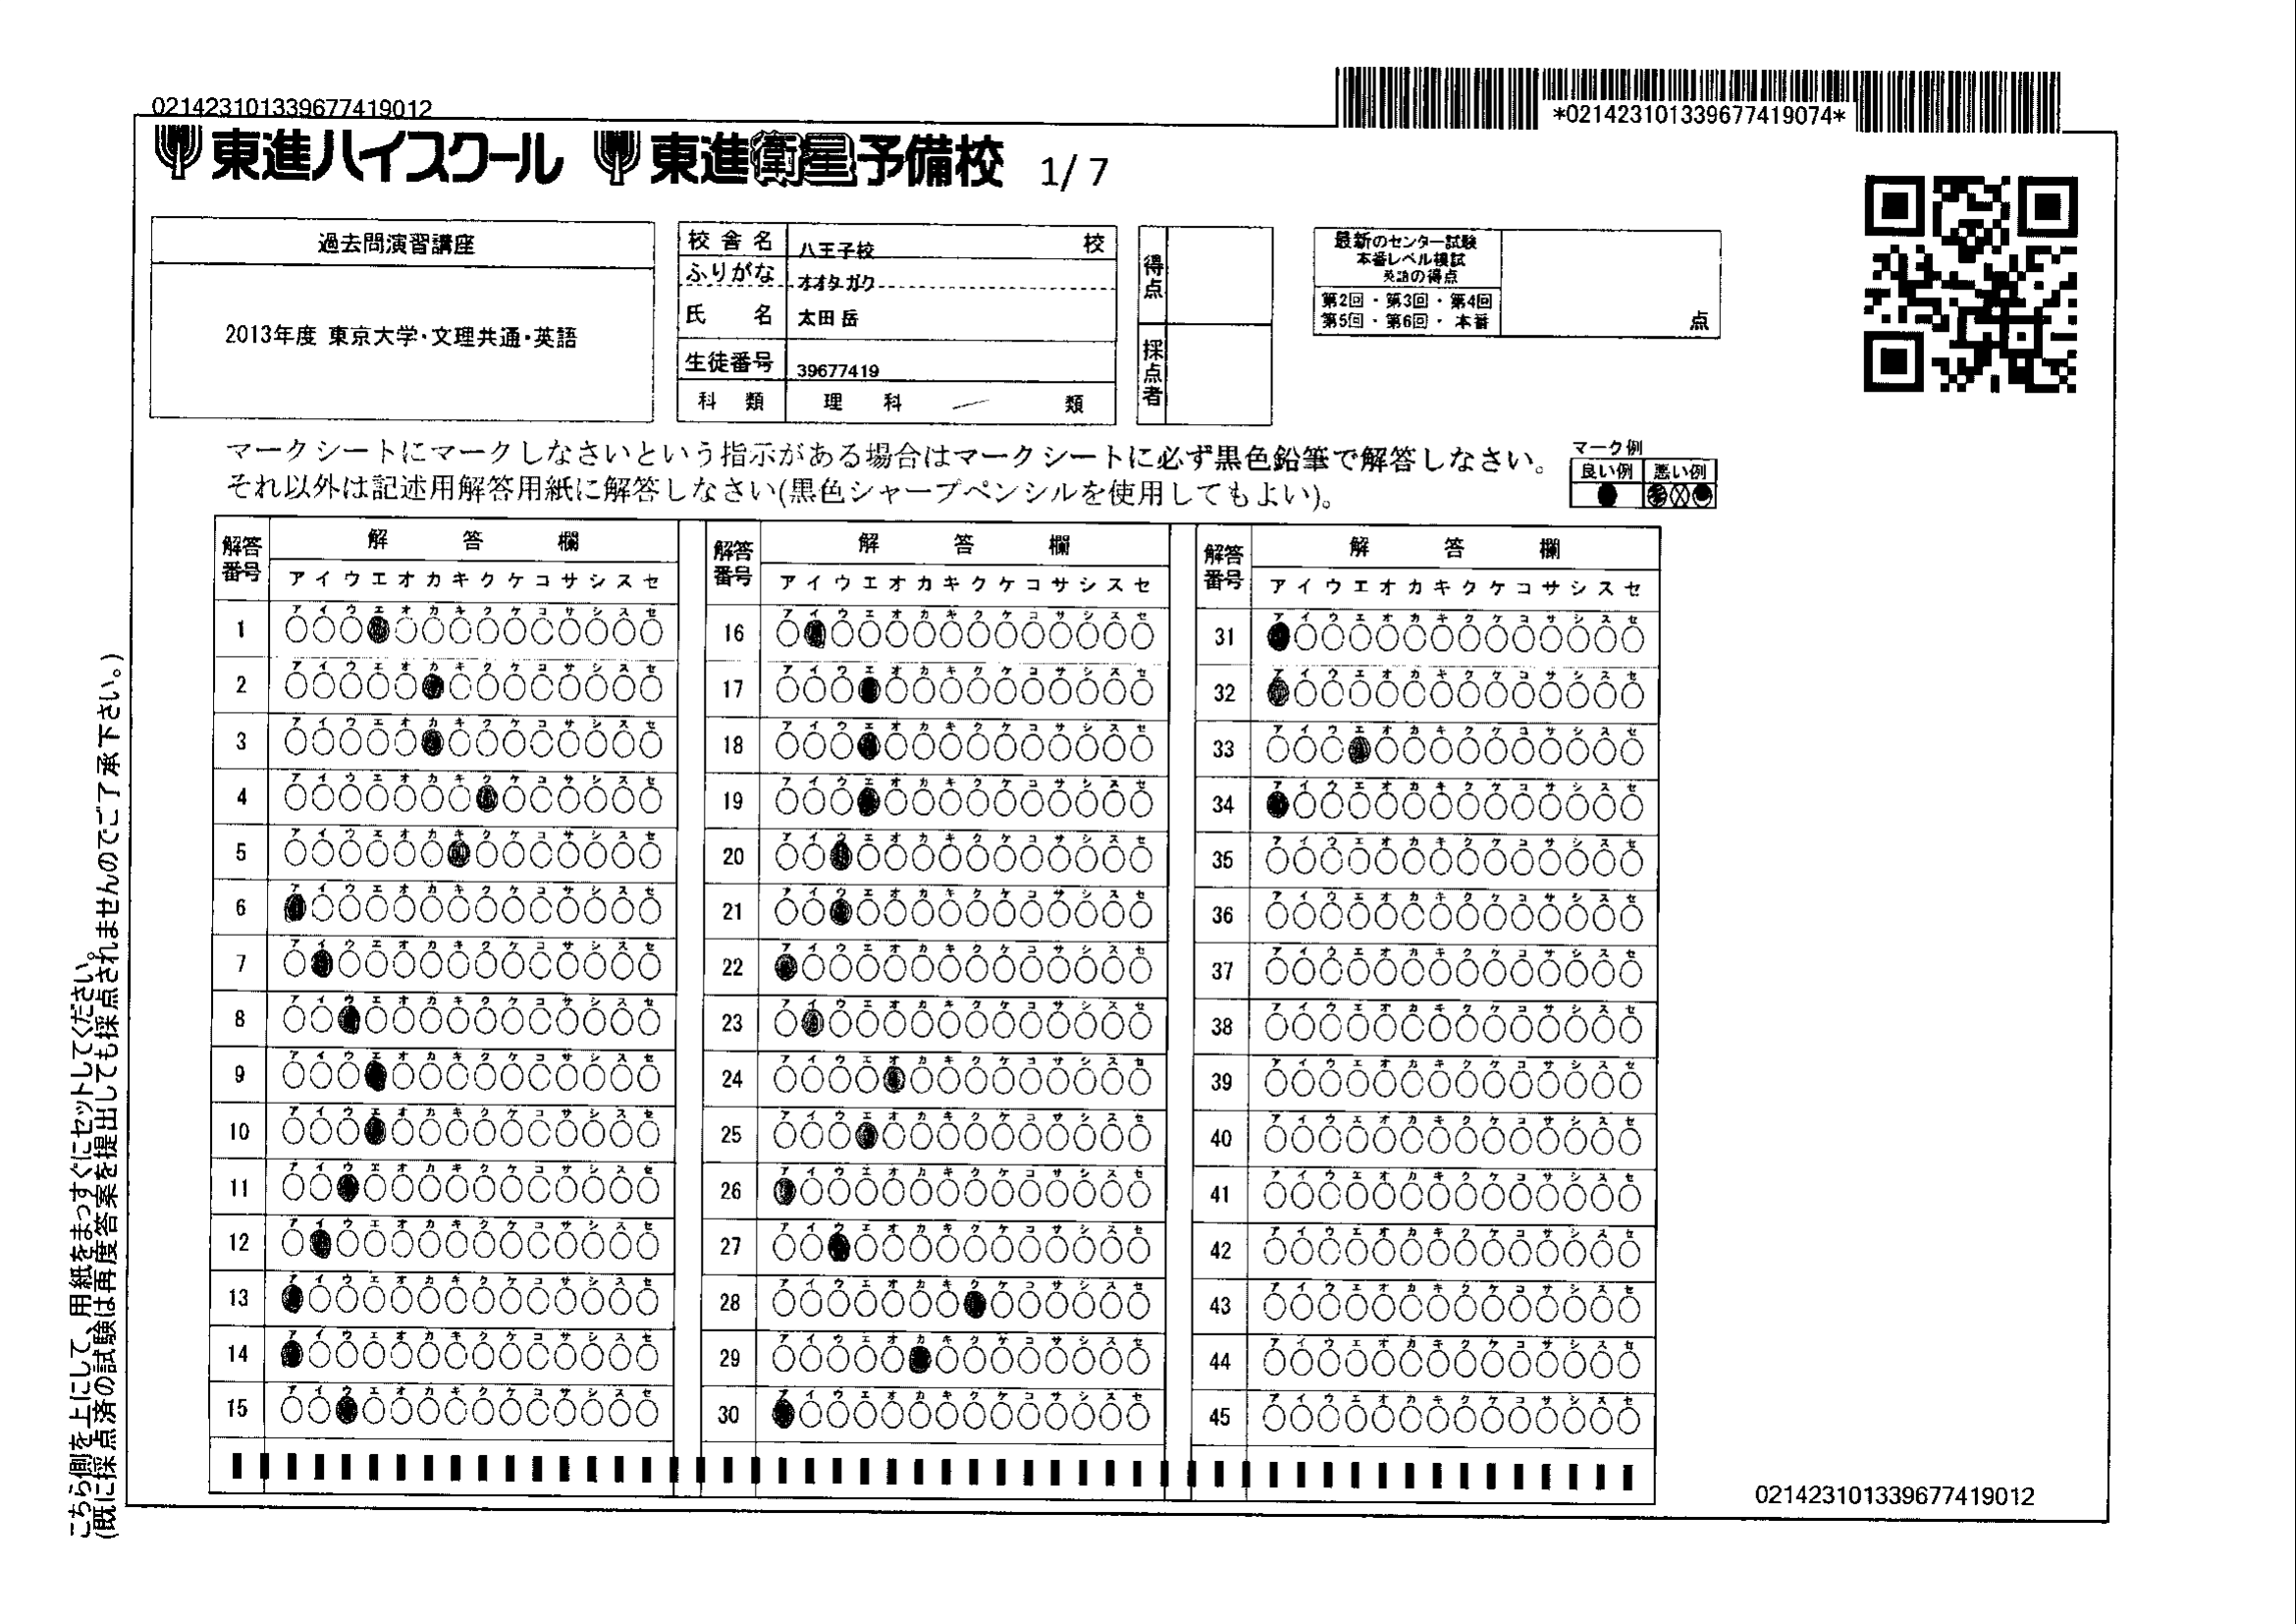

In [14]:
image_test1 = convert_from_path("/Users/hasegawatakashikana/Downloads/download3/021423101339677419.pdf")[0]
image_test1 = np.array(image_test1)
print(image_test1.shape)

# image_test1 = cv2.resize(image_test1,(841,595))
# cv2.imshow("a",image_test1)
# k = cv2.waitKey(0) & 0xFF 
# if k== ord("q"):
#     des_window()

image = Image.fromarray(np.uint8(image_test1))
print(image.size)
image.save("/Users/hasegawatakashikana/Downloads/aaaa.pdf",resolution=200)
image

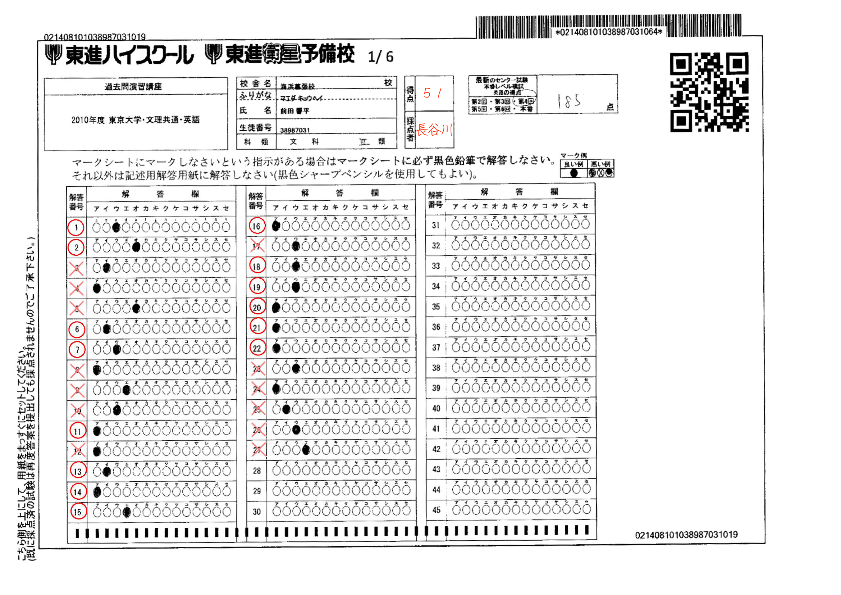

In [25]:
image

In [21]:
merge = PyPDF2.PdfFileMerger
merge.append(image)

TypeError: append() missing 1 required positional argument: 'fileobj'

In [406]:
image_test = convert_from_path("/Users/hasegawatakashikana/Downloads/13_test8.pdf")[0]
image_test = np.array(image_test)
for x in range(image_test.shape[0]):
    for y in range(image_test.shape[0]):
        if image_test[x][y].mean()>200:
            image_test[x][y]=[255,255,255]
image_test = Image.fromarray(np.uint8(image_test))
image_test.save("/Users/hasegawatakashikana/Downloads/try1.pdf")

In [407]:
image_test = Image.fromarray(np.uint8(image_test))
image_test.save("/Users/hasegawatakashikana/Downloads/try1.pdf")

In [400]:
image_test = convert_from_path("/Users/hasegawatakashikana/Downloads/13_test8.pdf")[1]
# image_test = np.array(image_test)
image_test=image_test.convert("RGB")
size = image_test.size

In [401]:
for x in range(size[0]):
    #y
    for y in range(size[1]):
        #ピクセルを取得
        r,g,b = image_test.getpixel((x,y))

        #反転処理
        if (g>200)&(b>200):
            r,g,b=255,255,255
        #set pixel
        image_test.putpixel((x,y),(r,g,b))

In [409]:
for i in range(2,7):
    print(i)

2
3
4
5
6


In [11]:
#メイン
image_test = convert_from_path("/Users/hasegawatakashikana/Desktop/before/021408101036427853.pdf")[0]
image_test = np.array(image_test)
if image_test[90:190,400].mean()>250:
    W,H = image_test.shape[:2]
    image_test = image_test[80:W-80,80:H-80]
    image_test=cv2.resize(image_test,(H,W))
img3 = image_test.copy()
img3[:,2000:] = 255
img3[1000:,500:1600]=255
# img3[:,:100] = 255
img_1 = image_standard.copy()
img_1[300:1300,110:1600] = 255
img_1[1000:,370:1700]=255
#画像をファイルから読み込み
img1=img_1
img2=img3

#特徴点の検索
#detecter = cv2.ORB_create() #ORB
detecter = cv2.AKAZE_create() #AKAZE

kp1, des1, scale1, imgSz1 = DetectKeyPoint( detecter, img1, 1200)
kp2, des2, scale2, imgSz2 = DetectKeyPoint( detecter, img2, 1200)

#マッチング
bf= cv2.BFMatcher( cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match( des1, des2)

#マッチングの選別
goodmatch, badmatch1 = MatchFilterDist( matches, None, 50) #distance が75以下をgoodmatch
goodmatch, badmatch2 =MatchFilterHelmart( kp1,scale1, kp2, scale2, goodmatch, None,3)


#マッチング結果の表示
height1, width1 = imgSz1.shape
height2, width2 = imgSz2.shape

heightm = max( height1, height2)
widthm  = width1 + width2

imgmGood=np.zeros( (heightm, widthm, 3), np.uint8)
cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, goodmatch, outImg=imgmGood, flags=2)

# imgmBad1=np.zeros( (heightm, widthm, 3), np.uint8)
# cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, badmatch1, outImg=imgmBad1, flags=2)

# imgmBad2=np.zeros( (heightm, widthm, 3), np.uint8)
# cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, badmatch2, outImg=imgmBad2, flags=2)

cv2.imshow( "Good matches", imgmGood) # 残ったマッチング
# # cv2.imshow( "Bad matches1", imgmBad1) # matches.distance によるもの
# # cv2.imshow( "Bad matches2", imgmBad2) # ヘルマート変換の推計から求めた座標と一定以上の距離があるもの

k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

1
2
3
4


<function matplotlib.pyplot.show(*args, **kw)>

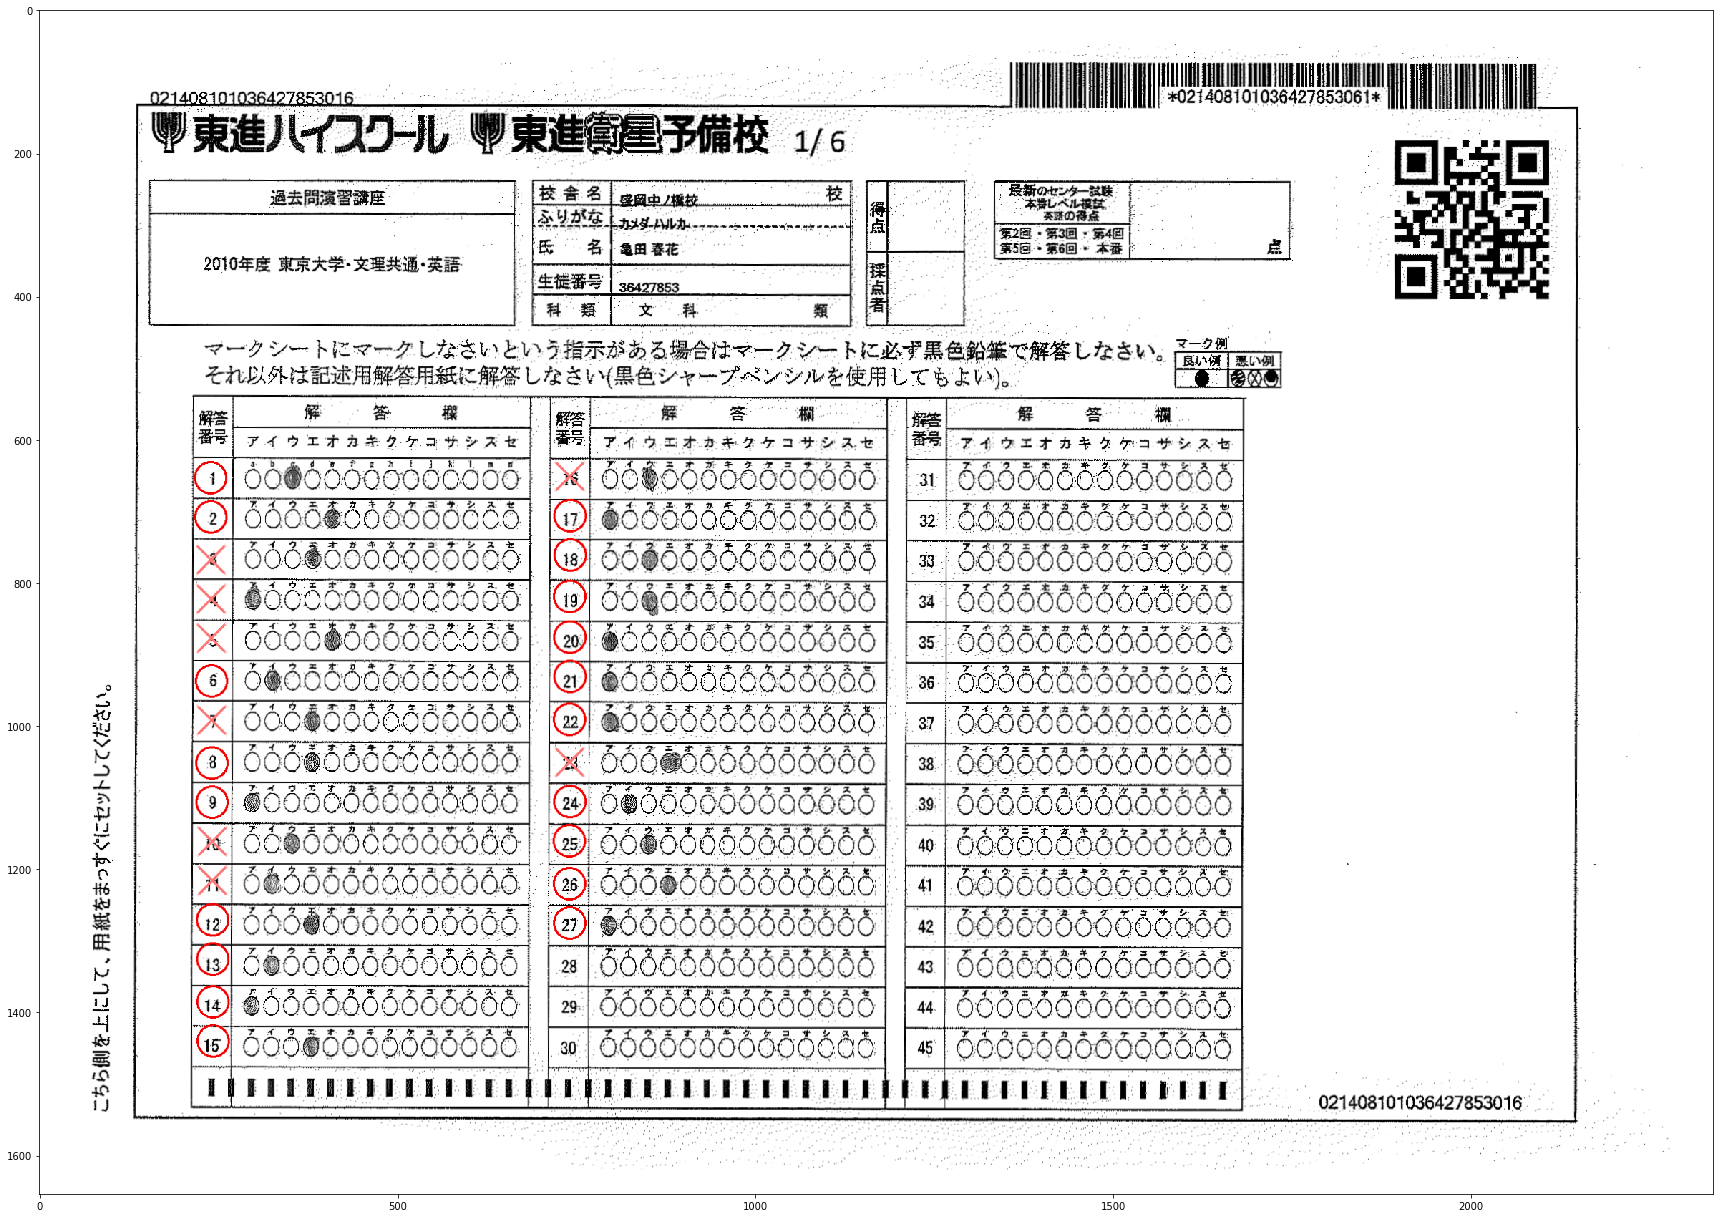

In [13]:
#メイン
img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in goodmatch]
img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in goodmatch]
# print(img1_pt[:10])
# print(img2_pt[:10])

img1_pt = np.array(img1_pt)    
img2_pt = np.array(img2_pt)
img1_pt = img1_pt*(image_standard.shape[1]/1200)
img2_pt = img2_pt*(image_standard.shape[1]/1200)

# やるべきこと
# １。特徴量３つ選ぶ
# ２。アフィン変換で調整する
# ３。もとの画像の大きさに戻す

k = 1
ax1,ax2=int((1323-80)*k),int((1323+80)*k)
ay1,ay2=int((83-50)*k),int((83+50)*k)
bx1,bx2=int((140-50)*k),int((140+50)*k)
by1,by2=int((120-50)*k),int((120+50)*k)
cx1,cx2=int((1920-160)*k),int((1920+160)*k)
cy1,cy2=int((1510-15)*k),int((1510+15)*k)
# dx1,dx2=int((1705-30)*k),int((1705+30)*k)
# dy1,dy2=int((460-30)*k),int((460+30)*k)
# d=140
dx1,dx2=int(185-55),int(185+55)
dy1,dy2=int(1485-35),int(1485+35)
ex1,ex2=int(80-50),int(80+50)
ey1,ey2=int(1500-60),int(1500+60)
feature = []
feature_stock=[]
for i,j in enumerate(img1_pt):
    if (j[0]>ax1)&(j[0]<ax2):
        if (j[1]>ay1)&(j[1]<ay2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
print(len(feature))
for i,j in enumerate(img1_pt):
    if (j[0]>bx1)&(j[0]<bx2):
        if (j[1]>by1)&(j[1]<by2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
print(len(feature))    
for i,j in enumerate(img1_pt):
    if (j[0]>cx1)&(j[0]<cx2):
        if (j[1]>cy1)&(j[1]<cy2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
print(len(feature))
for i,j in enumerate(img1_pt):
    if (j[0]>dx1)&(j[0]<dx2):
        if (j[1]>dy1)&(j[1]<dy2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
print(len(feature))
if len(feature)<4:
    for i,j in enumerate(img1_pt):
        if (j[0]>ex1)&(j[0]<ex2):
            if (j[1]>ey1)&(j[1]<ey2):
#             if (abs(j[0]-img2_pt[i][0])<d)&(abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(j)
#                 print(i)
                break
    
feature1 = []
for i in feature:
    feature1.append(img1_pt[i])
feature2 = []
for i in feature:
    feature2.append(img2_pt[i])
feature1 = np.array(feature1)
feature2 = np.array(feature2)
image = image_test.copy()
converted = identity1(image,feature1,feature2)
image=check2010(converted)
image=identity1(image,feature2,feature1)
fig = plt.figure(figsize=(30, 27))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show

In [260]:
def identity1(im,f1,f2):
    h, w = im.shape[:2]
    src = f2.astype(np.float32)
    dest = f1.astype(np.float32)
    M = cv2.getPerspectiveTransform( src,dest)
    return cv2.warpPerspective(im, M, (w, h), borderValue=(255, 255, 255))

In [340]:
def check_support(im,x,y,ox,oy,point=0):
    global score
    img_1=im.copy()
    img_1=img_1[x-15:x+20,y-12:y+12]
    if img_1.sum()/((img_1.shape)[0]*(img_1.shape[1]*3)) <190:
        red_circle(im,oy,ox)    
        score += point
    else:
        batu(im,oy,ox)

In [249]:
np.array([[0, 0], [0, 10], [10, 20], [20, 0]], dtype=np.float32).shape

(4, 2)

In [10]:
image_test = convert_from_path("/Users/hasegawatakashikana/Desktop/saiten2013/nclear7.pdf")[0]
image_test = np.array(image_test)
W,H = image_test.shape[:2]
image_test = image_test[80:W-80,80:H-80]
# image_test=cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB)
# fig = plt.figure(figsize=(30, 27))
# plt.imshow(image_test)
# plt.show
image_test=cv2.resize(image_test,(H,W))

In [14]:
#実験用
image_test = convert_from_path("/Users/hasegawatakashikana/Desktop/saiten2013/clear3.pdf")[0]
image_test = np.array(image_test)
# if image_test[90:190,400].mean()>250:
#     W,H = image_test.shape[:2]
#     image_test = image_test[80:W-80,80:H-80]
#     image_test=cv2.resize(image_test,(H,W))
img3 = image_test.copy()
img3[:,2000:] = 255
img3[:,:100] = 255
img_1 = image_standard.copy()
img_1[300:1500,110:1600] = 255
#画像をファイルから読み込み
img1=img_1
img2=img3

#特徴点の検索
#detecter = cv2.ORB_create() #ORB
detecter = cv2.AKAZE_create() #AKAZE

kp1, des1, scale1, imgSz1 = DetectKeyPoint( detecter, img1, 1200)
kp2, des2, scale2, imgSz2 = DetectKeyPoint( detecter, img2, 1200)

#マッチング
bf= cv2.BFMatcher( cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match( des1, des2)

#マッチングの選別
goodmatch, badmatch1 = MatchFilterDist( matches, None, 50) #distance が75以下をgoodmatch
goodmatch, badmatch2 =MatchFilterHelmart( kp1,scale1, kp2, scale2, goodmatch, None,3)


# # #マッチング結果の表示
height1, width1 = imgSz1.shape
height2, width2 = imgSz2.shape

heightm = max( height1, height2)
widthm  = width1 + width2

imgmGood=np.zeros( (heightm, widthm, 3), np.uint8)
cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, goodmatch, outImg=imgmGood, flags=2)

# imgmBad1=np.zeros( (heightm, widthm, 3), np.uint8)
# cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, badmatch1, outImg=imgmBad1, flags=2)

# imgmBad2=np.zeros( (heightm, widthm, 3), np.uint8)
# cv2.drawMatches( imgSz1, kp1, imgSz2, kp2, badmatch2, outImg=imgmBad2, flags=2)

cv2.imshow( "Good matches", imgmGood) # 残ったマッチング
# # cv2.imshow( "Bad matches1", imgmBad1) # matches.distance によるもの
# # cv2.imshow( "Bad matches2", imgmBad2) # ヘルマート変換の推計から求めた座標と一定以上の距離があるもの

k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()
# fig = plt.figure(figsize=(30, 27))
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.imshow(imgmGood)
# plt.show

In [124]:
#実験用
img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in goodmatch]
img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in goodmatch]

img1_pt = np.array(img1_pt)    
img2_pt = np.array(img2_pt)
img1_pt = img1_pt*(image_standard.shape[1]/1200)
img2_pt = img2_pt*(image_standard.shape[1]/1200)

# やるべきこと
# １。特徴量３つ選ぶ
# ２。アフィン変換で調整する
# ３。もとの画像の大きさに戻す

k = 1
ax1,ax2=int((1323-15)*k),int((1323+15)*k)
ay1,ay2=int((83-50)*k),int((83+50)*k)
bx1,bx2=int((140-50)*k),int((140+50)*k)
by1,by2=int((120-50)*k),int((120+50)*k)
cx1,cx2=int((1920-160)*k),int((1920+160)*k)
cy1,cy2=int((1510-15)*k),int((1510+15)*k)
dx1,dx2=int((1705-60)*k),int((1705+60)*k)
dy1,dy2=int((460-60)*k),int((460+60)*k)
ex1,ex2=int((920-75)*k),int((920+75)*k)
ey1,ey2=int((150-20)*k),int((150+20)*k)
fx1,fx2=int((2100-50)*k),int((100+50)*k)
fy1,fy2=int((120-20)*k),int((120+20)*k)
d=300
feature = []
feature_stock=[]
for i,j in enumerate(img1_pt):
    if (j[0]>ax1)&(j[0]<ax2):
        if (j[1]>ay1)&(j[1]<ay2):
            if (abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(len(feature))
                break
for i,j in enumerate(img1_pt):
    if (j[0]>bx1)&(j[0]<bx2):
        if (j[1]>by1)&(j[1]<by2):
            if (abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(len(feature))
                break
for i,j in enumerate(img1_pt):
    if (j[0]>cx1)&(j[0]<cx2):
        if (j[1]>cy1)&(j[1]<cy2):
            if (abs(j[1]-img2_pt[i][1])<d):
                feature.append(i) 
                feature_stock.append(i)
#                 print(len(feature))
                break
if len(feature)<3:
    for i,j in enumerate(img1_pt):
        if (j[0]>fx1)&(j[0]<fx2):
            if (j[1]>fy1)&(j[1]<fy2):
                 if (abs(j[1]-img2_pt[i][1])<d):
                    feature.append(i) 
                    feature_stock.append(i)
                    print(j)
                    print(i)
                    break
if len(feature)<3:
    for i,j in enumerate(img1_pt):
        if (j[0]>ex1)&(j[0]<ex2):
            if (j[1]>ey1)&(j[1]<ey2):
#                  if (abs(j[1]-img2_pt[i][1])<d):
                    feature.append(i) 
                    feature_stock.append(i)
                    print(j)
                    print(i)
                    break
if len(feature)<3:
    for i,j in enumerate(img1_pt):
        if (j[0]>dx1)&(j[0]<dx2):
            if (j[1]>dy1)&(j[1]<dy2):
#                  if (abs(j[1]-img2_pt[i][1])<d):
                    feature.append(i) 
                    feature_stock.append(i)
                    print(j)
                    print(i)
                    break
    

feature1 = []
for i in feature:
    feature1.append(img1_pt[i])
feature2 = []
for i in feature:
    feature2.append(img2_pt[i])
# print(feature1)
# print(feature2)
feature1 = np.array(feature1)
feature2 = np.array(feature2)
image = image_test.copy()
converted = identity(image,feature1,feature2)
image=check2010(converted)
image=identity(image,feature2,feature1)
fig = plt.figure(figsize=(30, 27))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show


NameError: name 'check_support' is not defined

In [388]:
image_test = convert_from_path("021408101328876415.pdf")[0]
image_test = np.array(image_test)
notclear = image_test.copy()

In [309]:
img = converted.copy()
img_1 = img[615:650,311:335]
if img_1.sum()/((img_1.shape)[0]*(img_1.shape[1]*3)) <190:
    red_circle(img,210,630)    
else:
    batu(img,210,630)

In [36]:
check_support(img,630,323,630,210)

In [ ]:
check_support(img,630,323,630,210)

In [53]:
cv2.imshow("a",img)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [ ]:

for i,j in enumerate(img1_pt):
    if (j[0]>845)&(j[0]<860):
        if (j[1]>222)&(j[1]<237):
            feature.append(i) 
            feature_stock.append(i)
            print(j)
            print(i)
            break

In [2111]:
#特徴量その１[100,100]の範囲内
feature = []
feature_stock=[]
for i,j in enumerate(img1_pt):
    if (j[0]<100)&(j[1]<100):
        if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<15):
            feature.append(i) 
            feature_stock.append(i)
            print(j)
            print(i)
            break

In [1369]:
#特徴量その2[100未満,400以上]の範囲内
for i,j in enumerate(img1_pt):
    if (j[0]<100)&(j[1]>400):
        if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<20):
            feature.append(i)
            feature_stock.append(i)
            print(j)
            print(i)
            break

In [1370]:
#特徴量その3[800以上,300未満]の範囲内
for i,j in enumerate(img1_pt):
    if (j[0]>800)&(j[1]<300):
        if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<20):
                feature.append(i)
                feature_stock.append(i)
                print(j)
                print(i)
                break


[824, 41]
2


In [1348]:
abs(img1_pt[2][1]-img2_pt[2][1])

6

In [1373]:
if len(feature)<3:
    for i,j in enumerate(img1_pt):
        if (j[1]>400):
            k = j[0]-img2_pt[i][0]
            l =j[1]-img2_pt[i][1]
            if (abs(k)<15)&(abs(j[1]-img2_pt[i][1])<15):
                
                if i not in feature_stock:
                    feature.append(i)
                    break

In [1381]:
a1=feature1[0][0]-feature2[0][0]
a2=feature1[1][0]-feature2[1][0]
a3=feature1[2][0]-feature2[2][0]
b1=feature1[0][1]-feature2[0][1]
b2=feature1[1][1]-feature2[1][1]
b3=feature1[2][1]-feature2[2][1]

In [1900]:
feature1,feature2

([array([1331.28083333,   56.52583333]),
  array([130.59416667,  91.61083333]),
  array([1783.4875    , 1495.01083333])],
 [array([1372.21333333,   74.06833333]),
  array([171.52666667, 105.255     ]),
  array([1824.42 , 1508.655])])

In [1901]:
feature1 = np.array(feature1)
feature2 = np.array(feature2)

In [1902]:
# feature1 = feature1*(image_standard.shape[1]/1200)
# feature2 = feature2*(image_standard.shape[1]/1200)

In [1903]:
feature1,feature2

(array([[1331.28083333,   56.52583333],
        [ 130.59416667,   91.61083333],
        [1783.4875    , 1495.01083333]]),
 array([[1372.21333333,   74.06833333],
        [ 171.52666667,  105.255     ],
        [1824.42      , 1508.655     ]]))

In [1904]:
image = image_test.copy()
converted = identity(image,feature1,feature2)


In [1905]:
check2010(converted)

In [128]:
cv2.imshow("a",imgSz2)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [946]:
def identity1(image,a,b):
    h, w = image.shape[:2]
    src = feature2.astype(np.float32)
    dest = feature3.astype(np.float32)
    affine = cv2.getAffineTransform(src, dest)
    return cv2.warpAffine(image, affine, (w, h))

In [1415]:
a1,a2,a3=1,-1,1
b1,b2,b3=1,-1,1
while not((((a1>=0)&(a2>=0)&(a3>=0))or((a1<=0)&(a2<=0)&(a3<=0)))&(((b1>=0)&(b2>=0)&(b3>=0))or((b1<=0)&(b2<=0)&(b3<=0)))):
    feature = []
    feature_stock=[]
    for i,j in enumerate(img1_pt):
        if (j[0]<100)&(j[1]<100):
            if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<15):
                if i not in feature_stock:
                    feature.append(i) 
#                     feature_stock.append(i)
                    print(j)
                    print(i)
                    break
    for i,j in enumerate(img1_pt):
        if (j[0]<100)&(j[1]>400):
            if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<20):
                if i not in feature_stock:
                    feature.append(i)
                    feature_stock.append(i)
                    print(j)
                    print(i)
                    break
    for i,j in enumerate(img1_pt):
        if (j[0]>800)&(j[1]<300):
            if (abs(j[0]-img2_pt[i][0])<10)&(abs(j[1]-img2_pt[i][1])<20):
                if i not in feature_stock:
                    feature.append(i)
#                     feature_stock.append(i)
                    print(j)
                    print(i)
                    break
    if len(feature)<3:
        for i,j in enumerate(img1_pt):
            if (j[1]>400):
                k = j[0]-img2_pt[i][0]
                l =j[1]-img2_pt[i][1]
                if (abs(k)<15)&(abs(j[1]-img2_pt[i][1])<15):
                
                    if i not in feature_stock:
                        feature.append(i)
                        break

        feature1 = []
    for i in feature:
        feature1.append(img1_pt[i])
    feature2 = []
    for i in feature:
        feature2.append(img2_pt[i])
        
    feature1 = np.array(feature1)
    feature2 = np.array(feature2)
    a1=feature1[0][0]-feature2[0][0]
    a2=feature1[1][0]-feature2[1][0]
    a3=feature1[2][0]-feature2[2][0]
    b1=feature1[0][1]-feature2[0][1]
    b2=feature1[1][1]-feature2[1][1]
    b3=feature1[2][1]-feature2[2][1]

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94,

19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[8

[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94,

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[8

[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94,

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[

[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824

[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94,

19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[94, 61]
19
[824, 41]
2
[

KeyboardInterrupt: 

In [944]:
c = [feature2[0][0]+a,feature2[0][1]+b]
feature3 = [feature2[0],feature2[0],c]

In [940]:
c

[154.63388888888883, 64.3225]

In [998]:
feature3=np.array(feature3)

In [56]:
pix = np.array(image)

In [58]:
cv2.imshow('image',pix)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
cv2.destroyAllWindows()


In [39]:
cd /Users/hasegawatakashikana/Downloads/download/

/Users/hasegawatakashikana/Downloads/download


In [24]:
sys.path.append("/Users/hasegawatakashikana/Desktop/poppler/bin")

In [28]:
sys.path

['',
 '/anaconda3/lib/python35.zip',
 '/anaconda3/lib/python3.5',
 '/anaconda3/lib/python3.5/plat-darwin',
 '/anaconda3/lib/python3.5/lib-dynload',
 '/Users/hasegawatakashikana/.local/lib/python3.5/site-packages',
 '/anaconda3/lib/python3.5/site-packages',
 '/anaconda3/lib/python3.5/site-packages/aeosa',
 '/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/Users/hasegawatakashikana/.ipython',
 'Users\\hasegawatakashikana\\Desktop',
 '/Users/hasegawatakashikana/Desktop',
 '/Users/hasegawatakashikana/Desktop/poppler/bin']

In [145]:
#ヘルマート変換パラメータの取得（推定）
def EstimatHelmert(srcPoint, dstPoint):
    hsX1 =0.0
    hsY1 =0.0
    hsX2 =0.0
    hsY2 =0.0
    hsn  =0.0
    hsM1 =0.0
    hsM2 =0.0
    hsM3 =0.0

    for i in range(len(srcPoint[:])):
        hX1=srcPoint[i][0]
        hY1=srcPoint[i][1]
        hX2=dstPoint[i][0]
        hY2=dstPoint[i][1]

        hsX1 += hX1
        hsY1 += hY1
        hsX2 += hX2
        hsY2 += hY2

        hsn  += 1
        hsM1 += hX1*hX2 + hY1*hY2
        hsM2 += hY1*hX2 - hX1*hY2
        hsM3 += hX1*hX1 + hY1*hY1

    if hsn < 0 :
        # 計算できない場合は変換無しで返す
        htA = 1
        htB = 0
        htC = 0
        htD = 0
    else:
        htA= (hsX1*hsX2+hsY1*hsY2-hsn*hsM1) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htB= (hsY1*hsX2-hsX1*hsY2-hsn*hsM2) / (hsX1*hsX1+hsY1*hsY1-hsn*hsM3)
        htC= (hsX2-htA*hsX1 - htB*hsY1) / hsn   
        htD= (hsY2-htA*hsY1 + htB*hsX1) / hsn

    return htA, htB, htC, -htB, htA, htD

#アフィン変換パラメータの取得（推定）
def EstimateAffine(srcPoint, dstPoint):
    mA = np.matrix( np.zeros((3,3),dtype=float) )
    mB = np.matrix( np.zeros((3,1),dtype=float) )
    mC = np.matrix( np.zeros((3,1),dtype=float) )

    for i in range(0, len(srcPoint)):
        mA[0,0] += srcPoint[i][0]**2
        mA[0,1] += srcPoint[i][0]*srcPoint[i][1]
        mA[0,2] += srcPoint[i][0]
        mA[1,1] += srcPoint[i][1]**2
        mA[1,2] += srcPoint[i][1]
        mA[2,2] += 1

        mB[0,0] += dstPoint[i][0] * srcPoint[i][0]
        mB[1,0] += dstPoint[i][0] * srcPoint[i][1]
        mB[2,0] += dstPoint[i][0]

        mC[0,0] += dstPoint[i][1] * srcPoint[i][0]
        mC[1,0] += dstPoint[i][1] * srcPoint[i][1]
        mC[2,0] += dstPoint[i][1]

    mA[1,0] = mA[0,1]
    mA[2,0] = mA[0,2]
    mA[2,1] = mA[1,2]

    if np.linalg.det( mA) == 0:
        # 計算無い場合は、変換無しで返す
        mU = np.array( [[1,], [0,], [0,]] )
        mV = np.array( [[0,], [1,], [0,]] )
    else:
        mU = mA.I * mB
        mV = mA.I * mC

    return mU[0,0], mU[1,0], mU[2,0], mV[0,0], mV[1,0], mV[2,0]




In [149]:
#テスト用座標の作成
sp=[ [100,100], [100,1000], [1000,100], [1000,1000] ]
dp=[  ]

for i in range( 0 , len(sp) ):
    dx=( sp[i][0] ) + random.randint(-10,10)
    dy=( sp[i][1] ) + random.randint(-10,10)

    dp.append([ dx, dy ])



#アフィン変換の推定
af=EstimateAffine( sp, dp )

#ヘルマート変換の推定
hl=EstimatHelmert( sp, dp )

#透視変換
srcPtF = np.float32( sp[:] ).reshape(-1,1,2) 
dstPtF = np.float32( dp[:] ).reshape(-1,1,2) 
M, mask = cv2.findHomography(srcPtF, dstPtF, cv2.RANSAC, 5.0)


#画像を変形して表示
img=image_standard.copy()
ImageSizeH,ImageSizeW = img.shape[:2]


#アフィン変換
AffineMatrix = np.float32(  [  af[0:3] ,  af[3:6]  ] )
img1=cv2.warpAffine( img, AffineMatrix, (ImageSizeW, ImageSizeH), flags=cv2.INTER_LINEAR)

#ヘルマート変換
AffineMatrix2 = np.float32( [ hl[0:3],  hl[3:6]  ] )
img2=cv2.warpAffine( img, AffineMatrix2, (ImageSizeW, ImageSizeH), flags=cv2.INTER_LINEAR)

#透視変換
img3 = cv2.warpPerspective(img, np.linalg.inv(M), (ImageSizeW,ImageSizeH))


#元画像に座標を重ねて表示
for i in sp:
    img=cv2.circle(img, (i[0],i[1]), 3, (255,0,0),thickness=2)
for i in dp:
    img=cv2.circle(img, (i[0],i[1]), 2, (0,255,0),thickness=1)


#変換画像を並べて表示
cv2.imshow ( "image", img1 )
cv2.waitKey(0)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()

In [736]:
def plus1():
    global b
    b =0
    print(b)

In [786]:
c = %pwd
a = os.listdir(path=c)
a

['clear2.pdf',
 'clear3.pdf',
 'clear1.pdf',
 'clear4.pdf',
 'clear5.pdf',
 'noclear.pdf',
 'clear6.pdf']

In [783]:
a = %pwd

In [776]:
x

<function posixpath.basename(p)>